--------------------------------------------------------------------------------------------------------------------------

<h1 style="font-family:Open Sans; font-size:30px";><center> Trade Program Optimization - Advance Analytics </center></h1>

--------------------------------------------------------------------------------------------------------------------------

<p style="font-family:Open Sans";> To finetune customer targeting in order to leverage the effectiveness of the trade term program. To apply analytics model in order to uncover any hidden gaps in master data and trade term is the selected case for this study. The customer Trade Program Targeting Recommendation has the object to support the trade marketing to do the program to the right customers and effective, Moreover, we would:

<br>
    <p style="font-family:Open Sans";> • Improve the trade program targeting effectively 
<br> •	Increase the sell volume of customers & program performance as well
<br> •	Understand the customer’s behaviors & performance 
<br> •	Improve the master data and data model & what the need to push master data help the trade program targeting.

</p>    

<h1 style="font-family:Open Sans; font-size:20px";>Dependencies & Library </h1>
<hr>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import datetime as datetime 

%matplotlib inline
#set bc seaborn as the defualt
#sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

# pivot-table-jsis a lightweight module that closely replicates the functionality of Excel and Google Sheets pivot tables. Used heavily in our internal suite of bespoke web apps that power our internal workflows, pivot-table-js allows you to apply aggregations to sets of values.
from pivottablejs import pivot_ui

<h1 style="font-family:Open Sans; font-size:20px";>Dataset Tranform & Load </h1>

In [2]:
#set full display all features
pd.set_option('display.max_columns', None)
target = pd.read_excel('dataset/target_customer.xlsx')
target.head(3)

Agent_Code                                Agent_Name  Outlet_Code  \
0    10021186  Khun Nhor                                    74000170   
1    10021186  Khun Nhor                                    74000170   
2    10021186  Khun Nhor                                    74000170   

  Outlet_Name OutletNameEn                Region      Province Account_Type  \
0   តាំង​ ឡាយ    TAING LAY  East                  Tboung Khmum       Outlet   
1   តាំង​ ឡាយ    TAING LAY  East                  Tboung Khmum       Outlet   
2   តាំង​ ឡាយ    TAING LAY  East                  Tboung Khmum       Outlet   

   Status   Grade   City      District Commune       Village  \
0  Active  Defend  Suong  Ponhea Kraek   Kraek  Kraek Tboung   
1  Active  Defend  Suong  Ponhea Kraek   Kraek  Kraek Tboung   
2  Active  Defend  Suong  Ponhea Kraek   Kraek  Kraek Tboung   

           Cluster_Lead     Segment Business_Org_Segment Business_Segment  \
0  Rural Traditional On  Soup & BBQ    Traditional Trade         On Trade   
1  Rural Traditional On  Soup & BBQ    Traditional Trade         On Trade   
2  Rural Traditional On  Soup & BBQ    Traditional Trade         On Trade   

  Category          ChannelName OutletCreditStatus  AMS_HCAM_Premium_Brand  \
0     Gold  Restaurant / Tavern          No Credit                   100.0   
1     Gold  Restaurant / Tavern          No Credit                   100.0   
2     Gold  Restaurant / Tavern          No Credit                   100.0   

   AMS_HCAM_Mainstream_Brand  AMS_Competitors_Premium_Brand  \
0                      100.0                           10.0   
1                      100.0                           10.0   
2                      100.0                           10.0   

   AMS_Competitors_Mainstream_Brand OrderType Document No_ DocType  \
0                              30.0        SO  KNM-0030444    Sale   
1                              30.0        SO  KNM-0030459    Sale   
2                              30.0        SO  KNM-0030489    Sale   

  ContractType     OrderCategory  ItemCode  Quantity      HL  amount1  \
0        Promo  Sale Transaction  10004510        54  4.2768   756.79   
1        Promo  Sale Transaction  10004510        18  1.4256   252.26   
2        Promo  Sale Transaction  10004510        36  2.8512   504.53   

   Amount Including VAT  itm_code  \
0                832.47  10004510   
1                277.49  10004510   
2                554.98  10004510   

                                             itm_des  OUTLET_LATITUDE  \
0  Tiger Crystal Pint 24x33cl                    ...         11.77254   
1  Tiger Crystal Pint 24x33cl                    ...         11.77254   
2  Tiger Crystal Pint 24x33cl                    ...         11.77254   

   OUTLET_LONGITUDE   level1_territory and Name level2_territory and Name  \
0         105.92761  RMKT_SUP3_R4-Menghour Chor       RMKT_SUP3-Simly Sin   
1         105.92761  RMKT_SUP3_R4-Menghour Chor       RMKT_SUP3-Simly Sin   
2         105.92761  RMKT_SUP3_R4-Menghour Chor       RMKT_SUP3-Simly Sin   

  level3_territory and Name level4_territory and Name Order Date Posting Date  \
0        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-02-04   2023-02-04   
1        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-02-06   2023-02-06   
2        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-02-08   2023-02-08   

          Posting Description Shipment Date   Due Date Document Date  
0  Invoice B2B-CO230204-00127    2023-02-04 2023-02-04    2023-02-04  
1  Invoice B2B-CO230206-00298    2023-02-06 2023-02-06    2023-02-06  
2          Invoice SI-0025982    2023-02-08 2023-02-08    2023-02-08

In [3]:
#set full display all features
pd.set_option('display.max_columns', None)
population = pd.read_excel('dataset/population_customer.xlsx')
population.head(3)

Agent_Code                                Agent_Name  Outlet_Code  \
0    10021186  Khun Nhor                                    74000124   
1    10021186  Khun Nhor                                    74000179   
2    10021186  Khun Nhor                                    74001768   

   Outlet_Name  OutletNameEn                Region      Province Account_Type  \
0  មិត្តយើង ៩៩  MET YEUNG 99  East                  Tboung Khmum       Outlet   
1   អ៊ុំ សំអាន    AUM SAM AN  East                  Tboung Khmum       Outlet   
2    ស្រី​ នាថ    SREY NEATH  East                  Tboung Khmum       Outlet   

   Status   Grade   City      District          Commune  \
0  Active    Grow  Suong  Ponhea Kraek       Kaong Kang   
1  Active  Defend  Suong         Memot              Dar   
2  Active    Grow  Suong  Ponhea Kraek  Trapeang Phlong   

                 Village           Cluster_Lead     Segment  \
0                 Stueng   Rural Traditional On  Soup & BBQ   
1              Dar Phsar  Rural Traditional Off  Drink Shop   
2  Trapeang Pring Ti Pir  Rural Traditional Off  Drink Shop   

  Business_Org_Segment Business_Segment Category          ChannelName  \
0    Traditional Trade         On Trade   Silver  Restaurant / Tavern   
1    Traditional Trade        Off Trade     Gold   Liquor Store Unuse   
2    Traditional Trade        Off Trade   Silver   Liquor Store Unuse   

  OutletCreditStatus  AMS_HCAM_Premium_Brand  AMS_HCAM_Mainstream_Brand  \
0          No Credit                    20.0                       50.0   
1             Credit                    20.0                      200.0   
2          No Credit                    10.0                      100.0   

   AMS_Competitors_Premium_Brand  AMS_Competitors_Mainstream_Brand OrderType  \
0                            2.0                              50.0        SO   
1                           30.0                             500.0        SO   
2                            0.0                             100.0        SO   

  Document No_ DocType ContractType     OrderCategory  ItemCode  Quantity  \
0  KNM-0030558    Sale        Promo  Sale Transaction  10004510        12   
1  KNM-0031353    Sale        Promo  Sale Transaction  10004510         5   
2  KNM-0031130    Sale        Promo  Sale Transaction  10004510         3   

       HL  amount1  Amount Including VAT  itm_code  \
0  0.9504   168.17                184.99  10004510   
1  0.3960    84.09                 92.50  10004510   
2  0.2376    50.45                 55.50  10004510   

                                             itm_des  OUTLET_LATITUDE  \
0  Tiger Crystal Pint 24x33cl                    ...         11.80797   
1  Tiger Crystal Pint 24x33cl                    ...         11.79057   
2  Tiger Crystal Pint 24x33cl                    ...         11.71304   

   OUTLET_LONGITUDE   level1_territory and Name level2_territory and Name  \
0         105.85790  RMKT_SUP3_R4-Menghour Chor       RMKT_SUP3-Simly Sin   
1         106.09623        RMKT_SUP3_R1-Ray Ron       RMKT_SUP3-Simly Sin   
2         105.96155  RMKT_SUP3_R4-Menghour Chor       RMKT_SUP3-Simly Sin   

  level3_territory and Name level4_territory and Name Order Date Posting Date  \
0        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-02-13   2023-02-13   
1        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-03-23   2023-03-24   
2        RMKT_SOM-Kosol Som       RM_CH-Sotheavy Heng 2023-03-15   2023-03-16   

          Posting Description Shipment Date   Due Date Document Date  
0          Invoice SI-0026015    2023-02-13 2023-02-13    2023-02-13  
1  Invoice B2B-CO230323-01883    2023-03-23 2023-03-24    2023-03-24  
2  Invoice B2B-CO230315-00622    2023-03-15 2023-03-16    2023-03-16

<h1 style="font-family:Open Sans; font-size:20px";>Data Wrangling & Cleansing</h1>
<hr>

In [4]:
#rename features

target.rename(columns={
    'Agent_Code':'agent_code',
    'Agent_Name' : 'agent_name',  
    'Outlet_Code':'outlet_code',
    'Outlet_Name':'outlet_name_kh',
    'OutletNameEn':'outlet_name_english',
    'Region': 'region',
    'Province':'province',
    'Account_Type':'account_type',
    'Status':'status',
    'Grade':'grade',
    'City':'city',
    'District':'district',
    'Commune':'commune',
    'Village':'village',
    'Cluster_Lead':'cluster_lead',
    'Segment':'segment',
    'Business_Org_Segment':'business_org_segment',
    'Business_Segment':'business_segment',
    'Category':'category',
    'ChannelName':'channel_name',
    'OutletCreditStatus':'outlet_credit_status',
    'AMS_HCAM_Premium_Brand':'ams_hcam_premium_brand',
    'AMS_HCAM_Mainstream_Brand':'ams_hcam_mainstream_brand',
    'AMS_Competitors_Premium_Brand':'ams_competitor_premium_brand',
    'AMS_Competitors_Mainstream_Brand':'ams_competitor_mainstream_brand',
    'OrderType':'order_type',  
    'Document No_':'document_number',
    'DocType':'document_type',  
    'ContractType':'contract_type',
    'OrderCategory':'order_category',
    'ItemCode':'item_code', 
    'Quantity':'quantity',   
    'HL':'hectoliter',  
    'amount1':'amount',  
    'Amount Including VAT':'gross_amount', 
    'itm_code':'item_code', 
    'itm_des':'item_name',
    'OUTLET_LATITUDE':'latitude',
    'OUTLET_LONGITUDE':'longitude',
    'level1_territory and Name':'sale_representative',
    'level2_territory and Name':'sale_supervisor',
    'level3_territory and Name':'sale_operation_manager',
    'level4_territory and Name':'channel_head',
    'Order Date':'order_date', 
    'Posting Date':'post_date',
    'Posting Description':'post_description',
    'Shipment Date':'shipment_date',
    'Due Date':'due_date',
    'Document Date':'document_date'
    
}, inplace=True)
target.tail(3)

agent_code                                agent_name  outlet_code  \
5765    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79011912   
5766    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79011912   
5767    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79011912   

     outlet_name_kh outlet_name_english                region    province  \
5765    ម៉កៈថៈបែបថៃ    MOOKATA BEB THAI  Central-1             Phnom Penh   
5766    ម៉កៈថៈបែបថៃ    MOOKATA BEB THAI  Central-1             Phnom Penh   
5767    ម៉កៈថៈបែបថៃ    MOOKATA BEB THAI  Central-1             Phnom Penh   

     account_type  status    grade        city    district       commune  \
5765       Outlet  Active  Monitor  Phnom Penh  Russey Keo  Ruessei Kaev   
5766       Outlet  Active  Monitor  Phnom Penh  Russey Keo  Ruessei Kaev   
5767       Outlet  Active  Monitor  Phnom Penh  Russey Keo  Ruessei Kaev   

       village          cluster_lead     segment business_org_segment  \
5765  Sameakki  Urban Traditional On  Soup & BBQ    Traditional Trade   
5766  Sameakki  Urban Traditional On  Soup & BBQ    Traditional Trade   
5767  Sameakki  Urban Traditional On  Soup & BBQ    Traditional Trade   

     business_segment category channel_name outlet_credit_status  \
5765         On Trade   Bronze     On Trade            No Credit   
5766         On Trade   Bronze     On Trade            No Credit   
5767         On Trade   Bronze     On Trade            No Credit   

      ams_hcam_premium_brand  ams_hcam_mainstream_brand  \
5765                     NaN                        NaN   
5766                     NaN                        NaN   
5767                     NaN                        NaN   

      ams_competitor_premium_brand  ams_competitor_mainstream_brand  \
5765                           NaN                              NaN   
5766                           NaN                              NaN   
5767                           NaN                              NaN   

     order_type document_number document_type contract_type    order_category  \
5765         SO     PDA-0035639          Sale         Promo  Sale Transaction   
5766         SO     PDA-0035639          Sale         Promo  Sale Transaction   
5767         SO     PDA-0036412          Sale         Promo  Sale Transaction   

      item_code  quantity  hectoliter  amount  gross_amount  item_code  \
5765   10003660         3      0.2376   38.86         42.75   10003660   
5766   10004510         3      0.2376   42.05         46.25   10004510   
5767   10004510        10      0.7920  140.15        154.16   10004510   

                                              item_name  latitude  longitude  \
5765  Tiger Pint 24x33cl                            ...  11.58517  104.90273   
5766  Tiger Crystal Pint 24x33cl                    ...  11.58517  104.90273   
5767  Tiger Crystal Pint 24x33cl                    ...  11.58517  104.90273   

              sale_representative       sale_supervisor  \
5765  UNPP_SUP1_R1-Chanviden Chan  UNPP_SUP1-Mesa Koeut   
5766  UNPP_SUP1_R1-Chanviden Chan  UNPP_SUP1-Mesa Koeut   
5767  UNPP_SUP1_R1-Chanviden Chan  UNPP_SUP1-Mesa Koeut   

     sale_operation_manager       channel_head order_date  post_date  \
5765   UNPP_SOM-Sokha Heang  UN_CH-Shereen Teh 2023-02-28 2023-02-28   
5766   UNPP_SOM-Sokha Heang  UN_CH-Shereen Teh 2023-02-28 2023-02-28   
5767   UNPP_SOM-Sokha Heang  UN_CH-Shereen Teh 2023-03-06 2023-03-06   

                post_description shipment_date   due_date document_date  
5765  Invoice B2B-CO230228-00645    2023-02-28 2023-02-28    2023-02-28  
5766  Invoice B2B-CO230228-00645    2023-02-28 2023-02-28    2023-02-28  
5767  Invoice B2B-CO230306-00701    2023-03-06 2023-03-06    2023-03-06

In [5]:
#rename features

population.rename(columns={
    'Agent_Code':'agent_code',
    'Agent_Name' : 'agent_name',  
    'Outlet_Code':'outlet_code',
    'Outlet_Name':'outlet_name_kh',
    'OutletNameEn':'outlet_name_english',
    'Region': 'region',
    'Province':'province',
    'Account_Type':'account_type',
    'Status':'status',
    'Grade':'grade',
    'City':'city',
    'District':'district',
    'Commune':'commune',
    'Village':'village',
    'Cluster_Lead':'cluster_lead',
    'Segment':'segment',
    'Business_Org_Segment':'business_org_segment',
    'Business_Segment':'business_segment',
    'Category':'category',
    'ChannelName':'channel_name',
    'OutletCreditStatus':'outlet_credit_status',
    'AMS_HCAM_Premium_Brand':'ams_hcam_premium_brand',
    'AMS_HCAM_Mainstream_Brand':'ams_hcam_mainstream_brand',
    'AMS_Competitors_Premium_Brand':'ams_competitor_premium_brand',
    'AMS_Competitors_Mainstream_Brand':'ams_competitor_mainstream_brand',
    'OrderType':'order_type',  
    'Document No_':'document_number',
    'DocType':'document_type',  
    'ContractType':'contract_type',
    'OrderCategory':'order_category',
    'ItemCode':'item_code', 
    'Quantity':'quantity',   
    'HL':'hectoliter',  
    'amount1':'amount',  
    'Amount Including VAT':'gross_amount', 
    'itm_code':'item_code', 
    'itm_des':'item_name',
    'OUTLET_LATITUDE':'latitude',
    'OUTLET_LONGITUDE':'longitude',
    'level1_territory and Name':'sale_representative',
    'level2_territory and Name':'sale_supervisor',
    'level3_territory and Name':'sale_operation_manager',
    'level4_territory and Name':'channel_head',
    'Order Date':'order_date', 
    'Posting Date':'post_date',
    'Posting Description':'post_description',
    'Shipment Date':'shipment_date',
    'Due Date':'due_date',
    'Document Date':'document_date'
    
}, inplace=True)
population.tail(3)

agent_code                                agent_name  outlet_code  \
8013    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79031773   
8014    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79031773   
8015    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.            79031773   

     outlet_name_kh outlet_name_english                region    province  \
8013    ប៊េមប៊ូផាប់          BAMBOO PUB  Central-1             Phnom Penh   
8014    ប៊េមប៊ូផាប់          BAMBOO PUB  Central-1             Phnom Penh   
8015    ប៊េមប៊ូផាប់          BAMBOO PUB  Central-1             Phnom Penh   

     account_type  status grade        city   district           commune  \
8013       Outlet  Active   NaN  Phnom Penh  Tuol Kouk  Tuek L'ak Ti Pir   
8014       Outlet  Active   NaN  Phnom Penh  Tuol Kouk  Tuek L'ak Ti Pir   
8015       Outlet  Active   NaN  Phnom Penh  Tuol Kouk  Tuek L'ak Ti Pir   

     village cluster_lead segment business_org_segment business_segment  \
8013  Phum 2          NaN     PUB         Modern Trade         On Trade   
8014  Phum 2          NaN     PUB         Modern Trade         On Trade   
8015  Phum 2          NaN     PUB         Modern Trade         On Trade   

     category channel_name outlet_credit_status  ams_hcam_premium_brand  \
8013      NaN     On Trade            No Credit                    80.0   
8014      NaN     On Trade            No Credit                    80.0   
8015      NaN     On Trade            No Credit                    80.0   

      ams_hcam_mainstream_brand  ams_competitor_premium_brand  \
8013                        NaN                          50.0   
8014                        NaN                          50.0   
8015                        NaN                          50.0   

      ams_competitor_mainstream_brand order_type document_number  \
8013                             40.0         SO     PDA-0036387   
8014                             40.0         SO     PDA-0037041   
8015                             40.0         SO     PDA-0038193   

     document_type contract_type    order_category  item_code  quantity  \
8013          Sale         Promo  Sale Transaction   10004510         2   
8014          Sale         Promo  Sale Transaction   10003660         2   
8015          Sale         Promo  Sale Transaction   10004510         5   

      hectoliter  amount  gross_amount  item_code  \
8013      0.1584   33.64          37.0   10004510   
8014      0.1584   31.09          34.2   10003660   
8015      0.3960   84.09          92.5   10004510   

                                              item_name  latitude  longitude  \
8013  Tiger Crystal Pint 24x33cl                    ...       NaN        NaN   
8014  Tiger Pint 24x33cl                            ...       NaN        NaN   
8015  Tiger Crystal Pint 24x33cl                    ...       NaN        NaN   

             sale_representative       sale_supervisor sale_operation_manager  \
8013  UNPP_SUP1_R4-TithPanha Top  UNPP_SUP1-Mesa Koeut   UNPP_SOM-Sokha Heang   
8014  UNPP_SUP1_R4-TithPanha Top  UNPP_SUP1-Mesa Koeut   UNPP_SOM-Sokha Heang   
8015  UNPP_SUP1_R4-TithPanha Top  UNPP_SUP1-Mesa Koeut   UNPP_SOM-Sokha Heang   

           channel_head order_date  post_date            post_description  \
8013  UN_CH-Shereen Teh 2023-03-06 2023-03-06  Invoice B2B-CO230306-00516   
8014  UN_CH-Shereen Teh 2023-03-08 2023-03-08  Invoice B2B-CO230308-00309   
8015  UN_CH-Shereen Teh 2023-03-17 2023-03-17  Invoice B2B-CO230317-00078   

     shipment_date   due_date document_date  
8013    2023-03-06 2023-03-06    2023-03-06  
8014    2023-03-08 2023-03-08    2023-03-08  
8015    2023-03-17 2023-03-17    2023-03-17

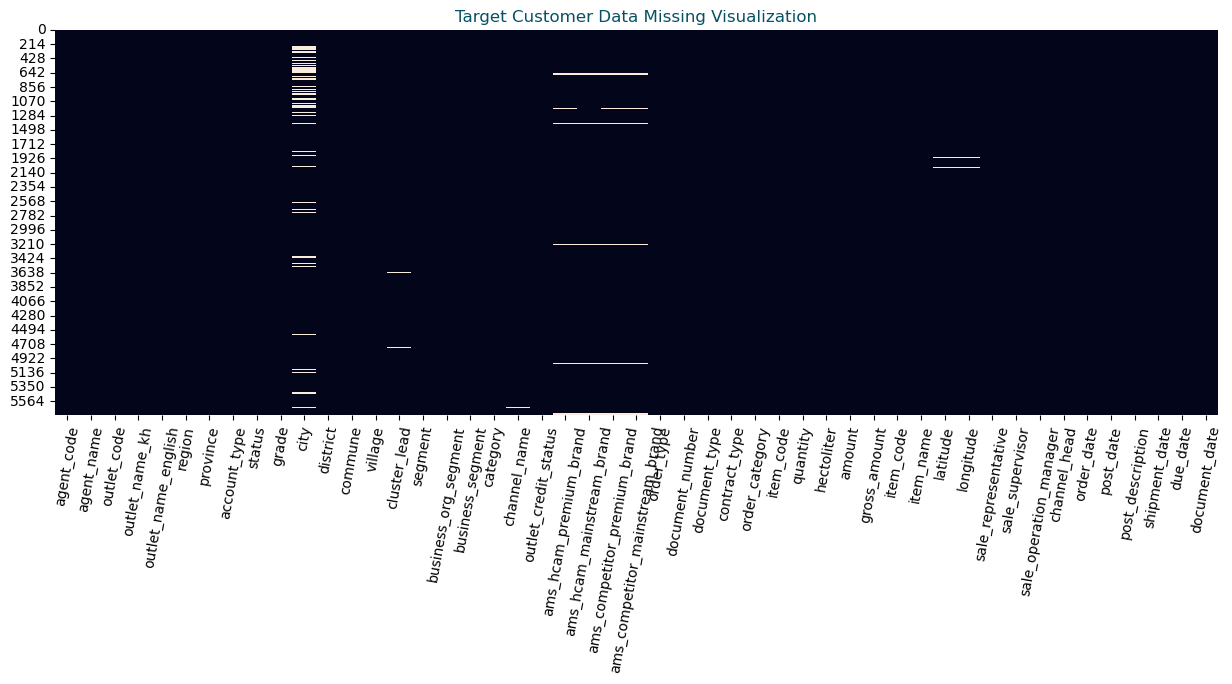

In [6]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(target.isnull(), cbar=False)
plt.title('Target Customer Data Missing Visualization',fontsize='12', color='#065164')
plt.xticks(rotation='80')
plt.show()

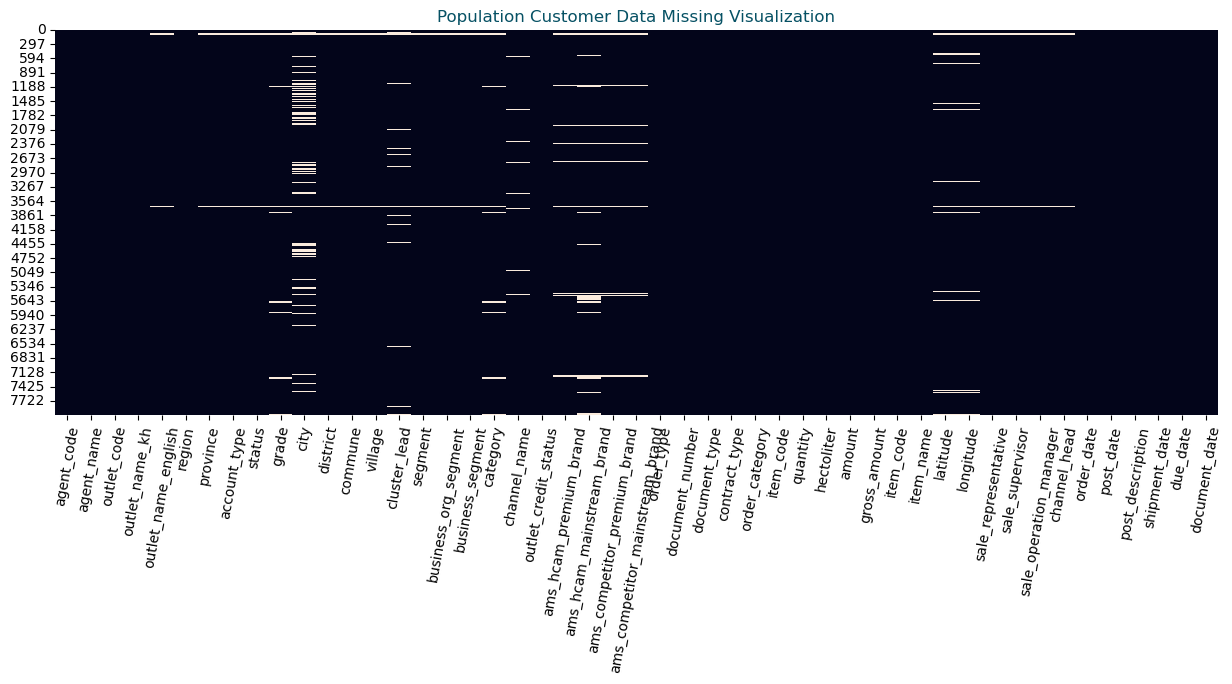

In [7]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(population.isnull(), cbar=False)
plt.title('Population Customer Data Missing Visualization',fontsize='12', color='#065164')
plt.xticks(rotation='80')
plt.show()

In [8]:
#check data type in each features of dataset

target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       5768 non-null   int64         
 1   agent_name                       5768 non-null   object        
 2   outlet_code                      5768 non-null   int64         
 3   outlet_name_kh                   5768 non-null   object        
 4   outlet_name_english              5768 non-null   object        
 5   region                           5768 non-null   object        
 6   province                         5768 non-null   object        
 7   account_type                     5768 non-null   object        
 8   status                           5768 non-null   object        
 9   grade                            5764 non-null   object        
 10  city                             5014 non-null   object     

In [9]:
#check data type in each features of dataset

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       8016 non-null   int64         
 1   agent_name                       8016 non-null   object        
 2   outlet_code                      8016 non-null   int64         
 3   outlet_name_kh                   8016 non-null   object        
 4   outlet_name_english              7939 non-null   object        
 5   region                           8016 non-null   object        
 6   province                         7936 non-null   object        
 7   account_type                     7936 non-null   object        
 8   status                           7936 non-null   object        
 9   grade                            7775 non-null   object        
 10  city                             6920 non-null   object     

In [10]:
#number of observation and features - target 

print("Number Of Dimension:", target.shape[1])
print("Number Of Samples:", target.shape[0])

print("*" * 100)

#number of observation and features -- population 
print("Number Of Dimension:", population.shape[1])
print("Number Of Samples:", population.shape[0])

Number Of Dimension: 49
Number Of Samples: 5768
****************************************************************************************************
Number Of Dimension: 49
Number Of Samples: 8016


In [11]:
#check missing value if there are any missing data.
target_missing_value = target.isnull().sum()
percent_target_missing_value = target_missing_value / len(target)
print("*" * 100)
print("Missing Value:\n", target_missing_value)
print("*" * 100)
print("Pecent of Missing Value:\n", percent_target_missing_value)

****************************************************************************************************
Missing Value:
 agent_code                           0
agent_name                           0
outlet_code                          0
outlet_name_kh                       0
outlet_name_english                  0
region                               0
province                             0
account_type                         0
status                               0
grade                                4
city                               754
district                             0
commune                              0
village                              0
cluster_lead                        42
segment                              0
business_org_segment                 0
business_segment                     0
category                             4
channel_name                         6
outlet_credit_status                 0
ams_hcam_premium_brand             130
ams_hcam_mainstream_brand

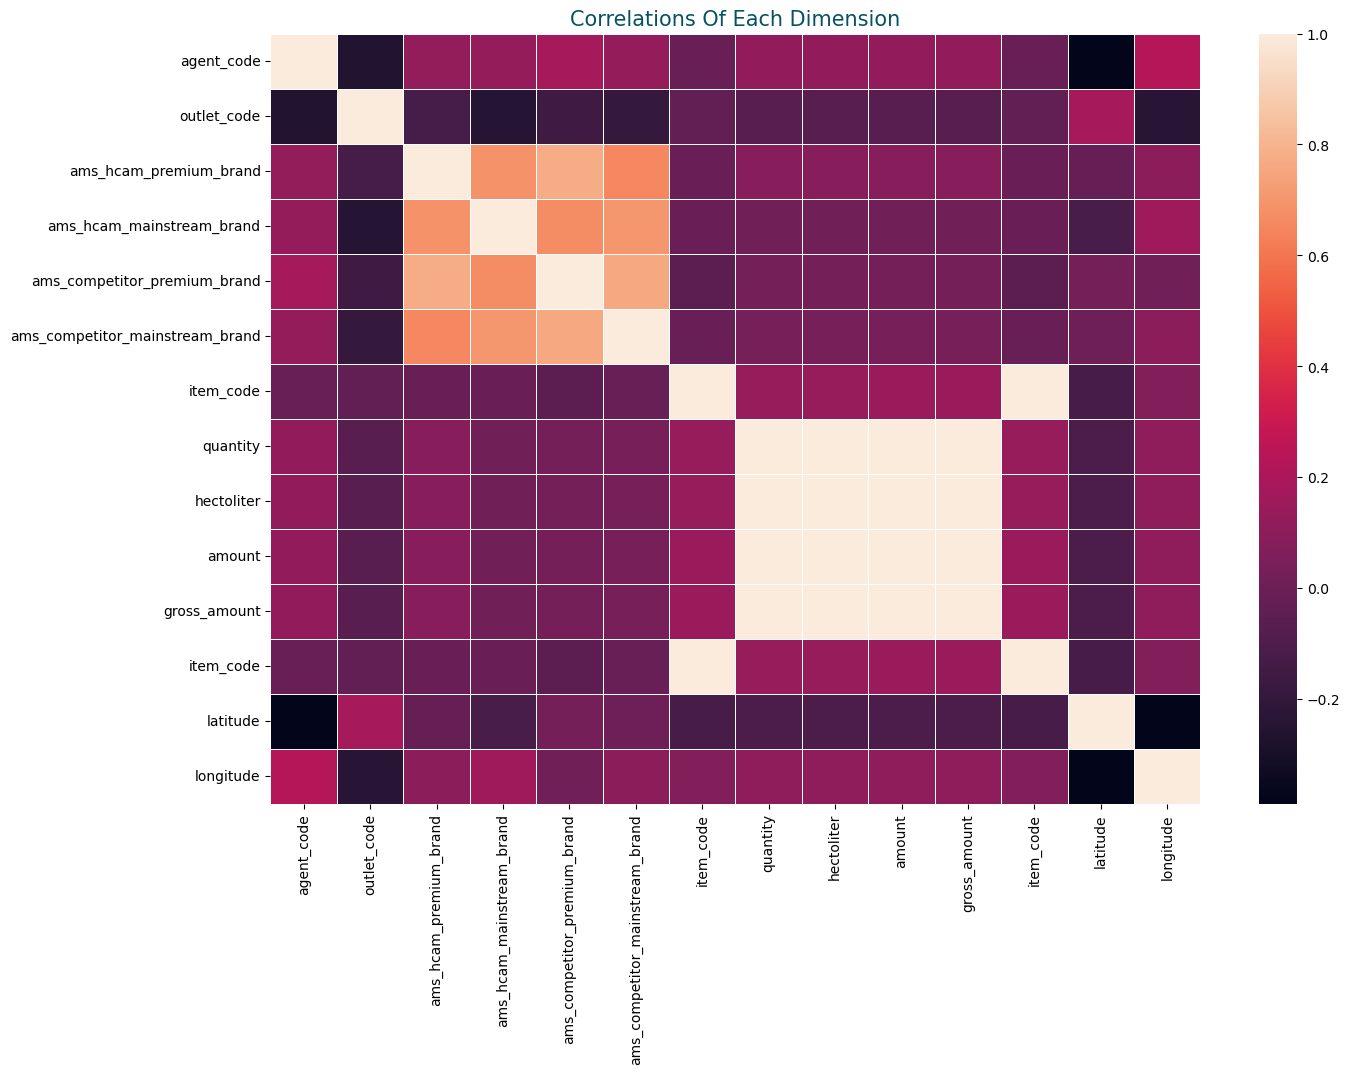

agent_code   outlet_code  ams_hcam_premium_brand  \
count  5.768000e+03  5.768000e+03             5638.000000   
mean   1.015336e+07  7.526842e+07               54.175949   
std    1.303005e+05  3.274835e+06               91.014682   
min    1.002119e+07  7.100002e+07                0.000000   
25%    1.002120e+07  7.131879e+07               10.000000   
50%    1.015752e+07  7.610317e+07               30.000000   
75%    1.029058e+07  7.802227e+07               50.000000   
max    1.033216e+07  7.901939e+07              700.000000   

       ams_hcam_mainstream_brand  ams_competitor_premium_brand  \
count                5637.000000                   5638.000000   
mean                  107.403938                     20.747251   
std                   143.236059                     36.266837   
min                     0.000000                      0.000000   
25%                    30.000000                      2.000000   
50%                    65.000000                     10.000000   
75%                   130.000000                     25.000000   
max                  1190.000000                    300.000000   

       ams_competitor_mainstream_brand     item_code     quantity  \
count                      5638.000000  5.768000e+03  5768.000000   
mean                         43.862895  1.000422e+07    19.124653   
std                          66.792859  4.037137e+02    37.729250   
min                           0.000000  1.000366e+07  -500.000000   
25%                          10.000000  1.000366e+07     5.000000   
50%                          30.000000  1.000451e+07     6.000000   
75%                          50.000000  1.000451e+07    20.000000   
max                         600.000000  1.000451e+07  1200.000000   

        hectoliter        amount  gross_amount     item_code     latitude  \
count  5768.000000   5768.000000   5768.000000  5.768000e+03  5705.000000   
mean      1.514673    262.652077    288.917098  1.000422e+07    11.789578   
std       2.988157    524.224745    576.647371  4.037137e+02     0.837619   
min     -39.600000  -6477.010000  -7124.710000  1.000366e+07    10.428990   
25%       0.396000     70.070000     77.080000  1.000366e+07    11.479660   
50%       0.475200     84.090000     92.500000  1.000451e+07    11.560650   
75%       1.584000    259.080000    284.990000  1.000451e+07    11.914800   
max      95.040000  16817.510000  18499.260000  1.000451e+07    14.248330   

         longitude  
count  5705.000000  
mean    104.550640  
std       0.753306  
min     102.366120  
25%     104.168050  
50%     104.890760  
75%     104.927760  
max     107.199580

In [12]:
#Descriptive Statistic

target_correlations = target.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(target_correlations, 
           xticklabels=target_correlations.columns.values,
           yticklabels=target_correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations Of Each Dimension', fontsize='15', color='#065164')
plt.show()

target.describe()
#data.describe(include='all')

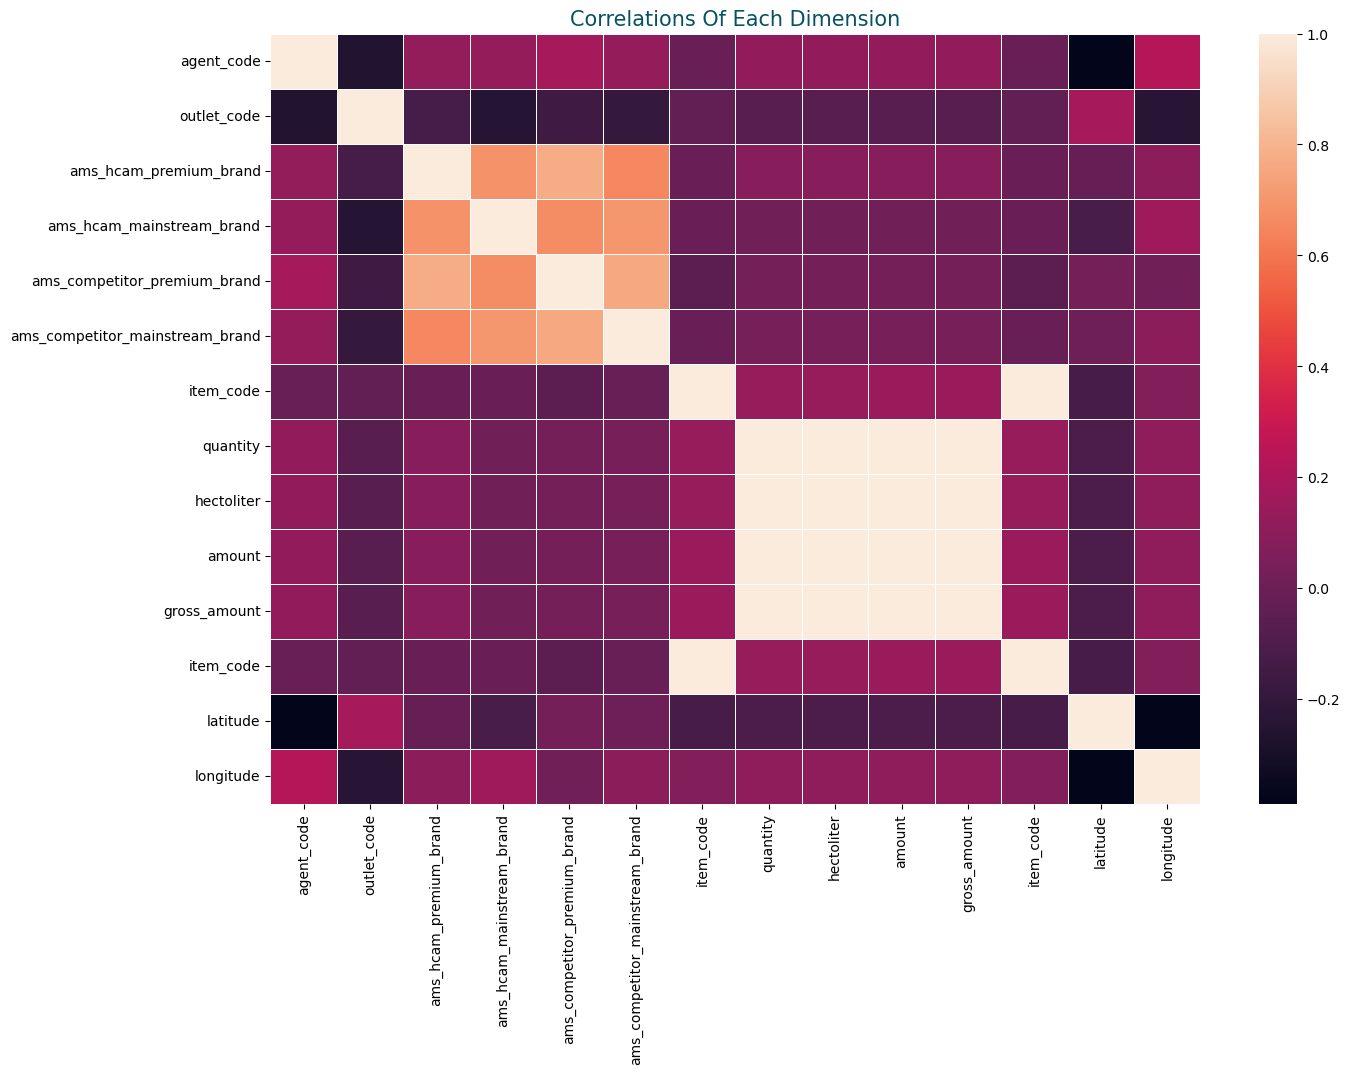

agent_code   outlet_code  ams_hcam_premium_brand  \
count  8.016000e+03  8.016000e+03             7803.000000   
mean   1.011804e+07  7.575009e+07               80.186595   
std    1.228970e+05  3.273300e+06              181.593117   
min    1.002119e+07  1.002122e+07                0.000000   
25%    1.002120e+07  7.300392e+07               10.000000   
50%    1.002121e+07  7.610347e+07               25.000000   
75%    1.029058e+07  7.802370e+07               60.000000   
max    1.033216e+07  7.903220e+07             3020.000000   

       ams_hcam_mainstream_brand  ams_competitor_premium_brand  \
count                7457.000000                   7803.000000   
mean                  189.551160                     37.573369   
std                   480.821589                     91.894218   
min                     0.000000                      0.000000   
25%                    30.000000                      2.000000   
50%                    60.000000                     10.000000   
75%                   160.000000                     30.000000   
max                 10520.000000                    800.000000   

       ams_competitor_mainstream_brand     item_code     quantity  \
count                      7803.000000  8.016000e+03  8016.000000   
mean                        153.295271  1.000420e+07    13.374127   
std                         471.917159  4.092162e+02    30.282107   
min                           0.000000  1.000366e+07   -68.000000   
25%                          10.000000  1.000366e+07     2.000000   
50%                          30.000000  1.000451e+07     5.000000   
75%                         100.000000  1.000451e+07    10.000000   
max                       12000.000000  1.000451e+07   500.000000   

        hectoliter       amount  gross_amount     item_code     latitude  \
count  8016.000000  8016.000000   8016.000000  8.016000e+03  7696.000000   
mean      1.059231   188.332033    207.171598  1.000420e+07    12.069124   
std       2.398343   418.221026    460.040333  4.092162e+02     1.183605   
min      -5.385600 -1057.090000  -1162.800000  1.000366e+07     0.000000   
25%       0.158400    33.640000     37.000000  1.000366e+07    11.539030   
50%       0.396000    77.730000     85.500000  1.000451e+07    11.581020   
75%       0.792000   168.170000    184.990000  1.000451e+07    12.854090   
max      39.600000  7007.290000   7708.020000  1.000451e+07    41.859240   

         longitude  
count  7696.000000  
mean    104.550852  
std       3.303451  
min       0.000000  
25%     103.862640  
50%     104.900590  
75%     104.947707  
max     111.000000

In [13]:
#Descriptive Statistic

population_correlations = population.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(target_correlations, 
           xticklabels=population_correlations.columns.values,
           yticklabels=population_correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations Of Each Dimension', fontsize='15', color='#065164')
plt.show()

population.describe()
#data.describe(include='all')

In [14]:
#convert the float values from negative to positive 

target['quantity'] = target['quantity'].abs()
target['hectoliter'] = target['hectoliter'].abs()
target['quantity'] = target['amount'].abs()
target['quantity'] = target['gross_amount'].abs()

population['quantity'] = population['quantity'].abs()
population['hectoliter'] = population['hectoliter'].abs()
population['quantity'] = population['amount'].abs()
population['quantity'] = population['gross_amount'].abs()

<h1 style="font-family:Open Sans; font-size:20px";> Exploratory Data Analysis - Targeted Customer</h1>
<hr>

<h1 style="font-family:Open Sans; font-size:15px";> <center>Trade Program Performance by Outlet </center></h1>
<hr>

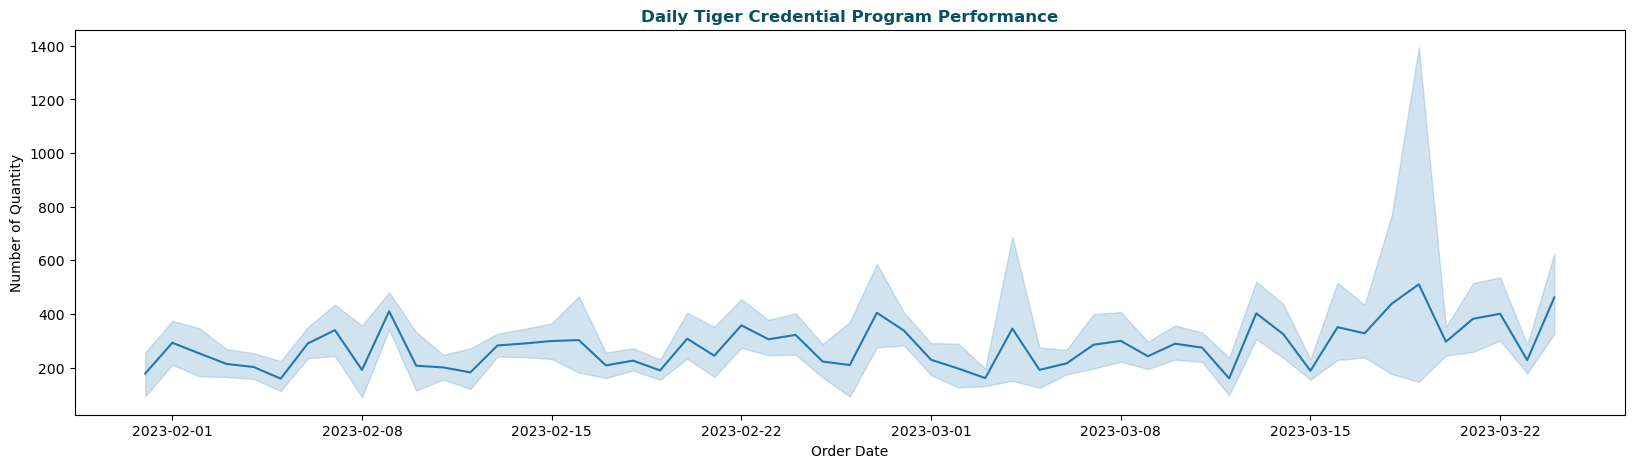

In [15]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=target, x="order_date", y="quantity", legend='auto')

plt.title('Daily Tiger Credential Program Performance',fontsize='12', fontweight='bold', color='#065164')
plt.xlabel('Order Date')
plt.ylabel('Number of Quantity')
#plt.legend()
plt.show()

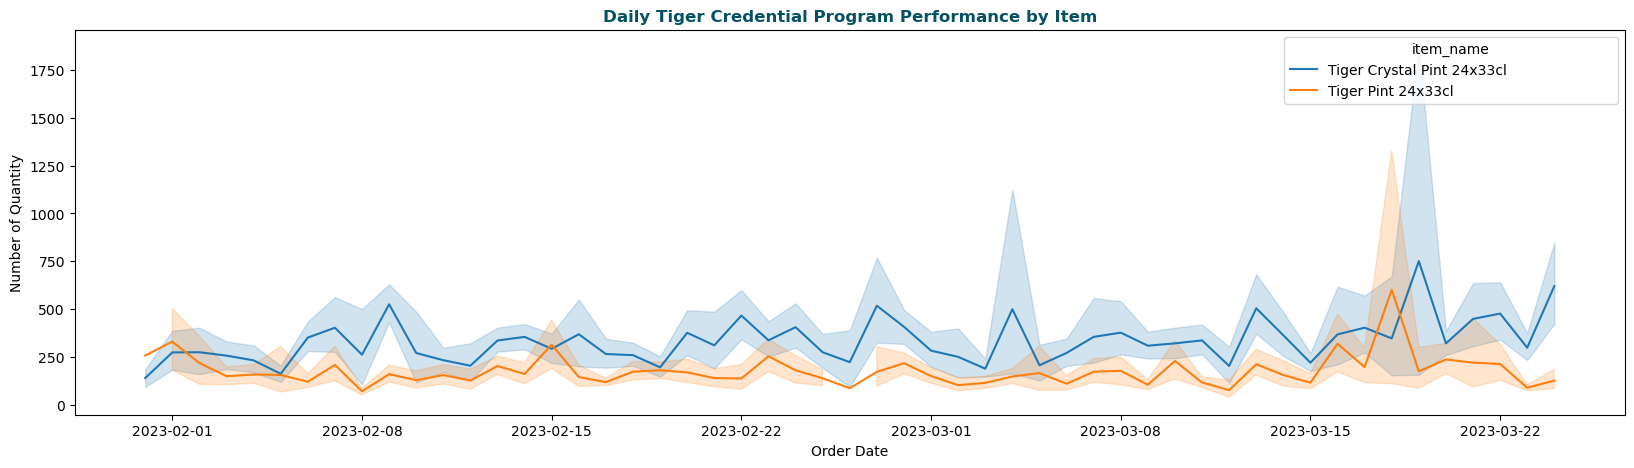

In [16]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=target, x="order_date", y="quantity", hue="item_name")

plt.title('Daily Tiger Credential Program Performance by Item', fontweight='bold',fontsize='12', color='#065164')
plt.xlabel('Order Date')
plt.ylabel('Number of Quantity')
#plt.legend()
plt.show()

In [17]:
import plotly.graph_objects as go

total_quantity_by_item_name = target.groupby(['item_name'])['quantity'].sum()
total_quantity_by_item_name.to_frame().reset_index()

labels = target.item_name.unique()
values = total_quantity_by_item_name

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

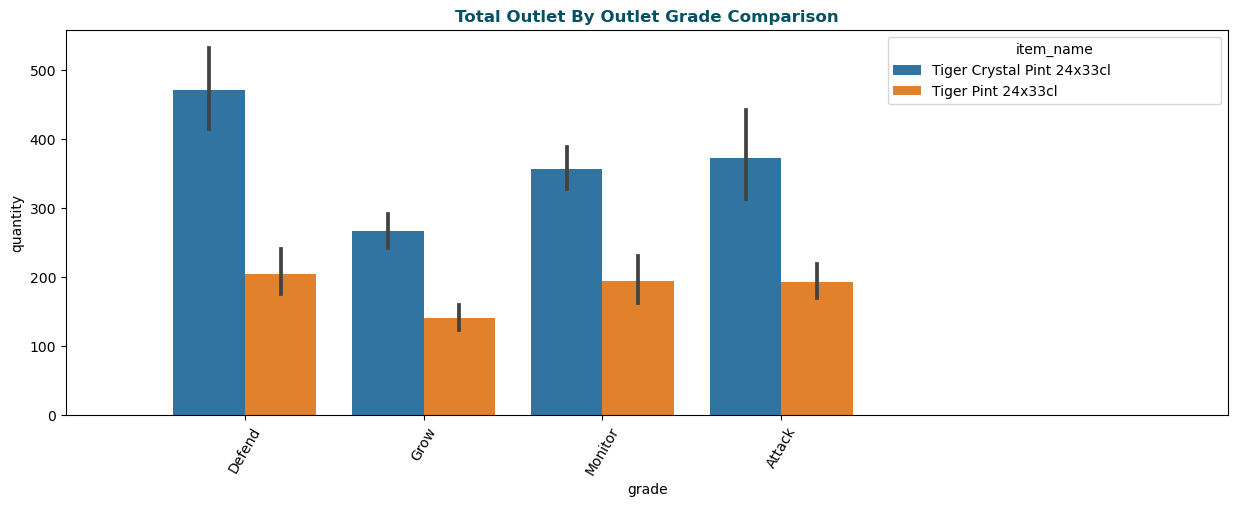

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade', y='quantity' , hue='item_name' ,data=target)
plt.title('Total Outlet By Outlet Grade Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

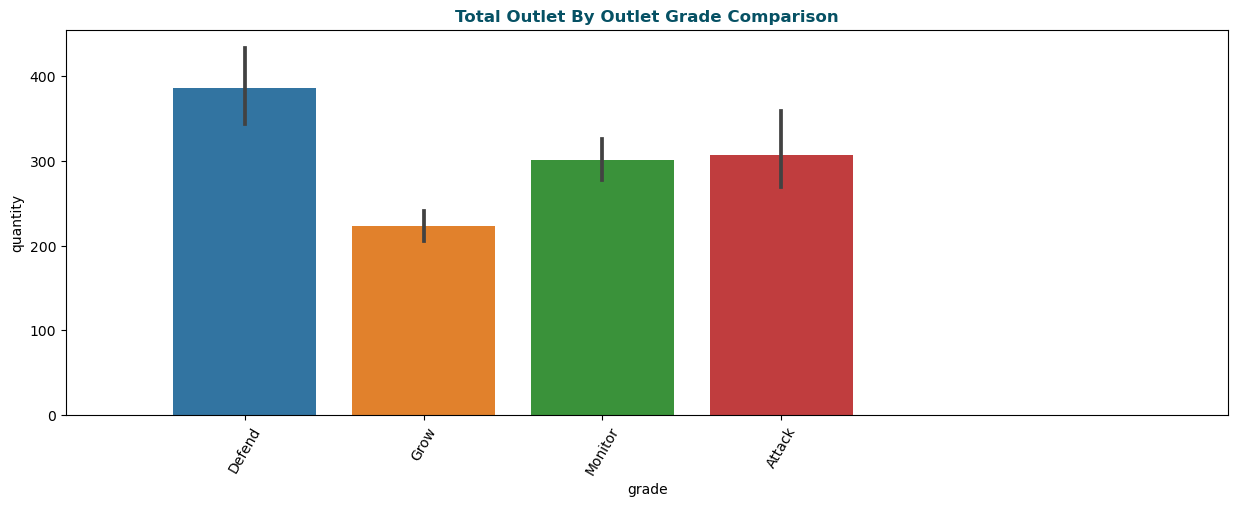

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade', y='quantity' ,data=target)
plt.title('Total Outlet By Outlet Grade Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

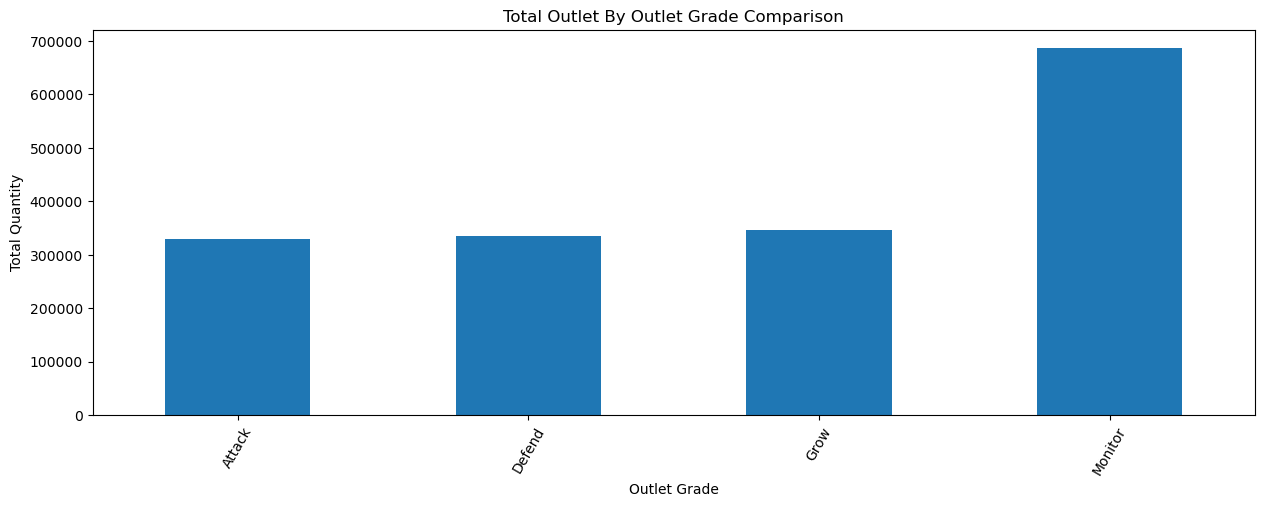

grade
Attack     328885.68
Defend     335163.91
Grow       345742.02
Monitor    686375.66
Name: quantity, dtype: float64

In [20]:
target_outlet_by_grade = target.groupby(['grade'])['quantity'].sum()
target_outlet_by_grade.to_frame().reset_index()

target_outlet_by_grade.plot(kind='bar', title='Total Outlet By Outlet Grade Comparison', ylabel='Total Quantity',
         xlabel='Outlet Grade', figsize=(15, 5))
plt.xticks(rotation='60')
plt.show()

target_outlet_by_grade

In [21]:
# pivot-table-jsis a lightweight module that closely replicates the functionality of Excel and Google Sheets pivot tables. Used heavily in our internal suite of bespoke web apps that power our internal workflows, pivot-table-js allows you to apply aggregations to sets of values.
from pivottablejs import pivot_ui

pivot_ui(target)

<hr>
<h1 style="font-family:Open Sans; font-size:15px";> <center>Trade Program Performance By Territory</center></h1>
<hr>

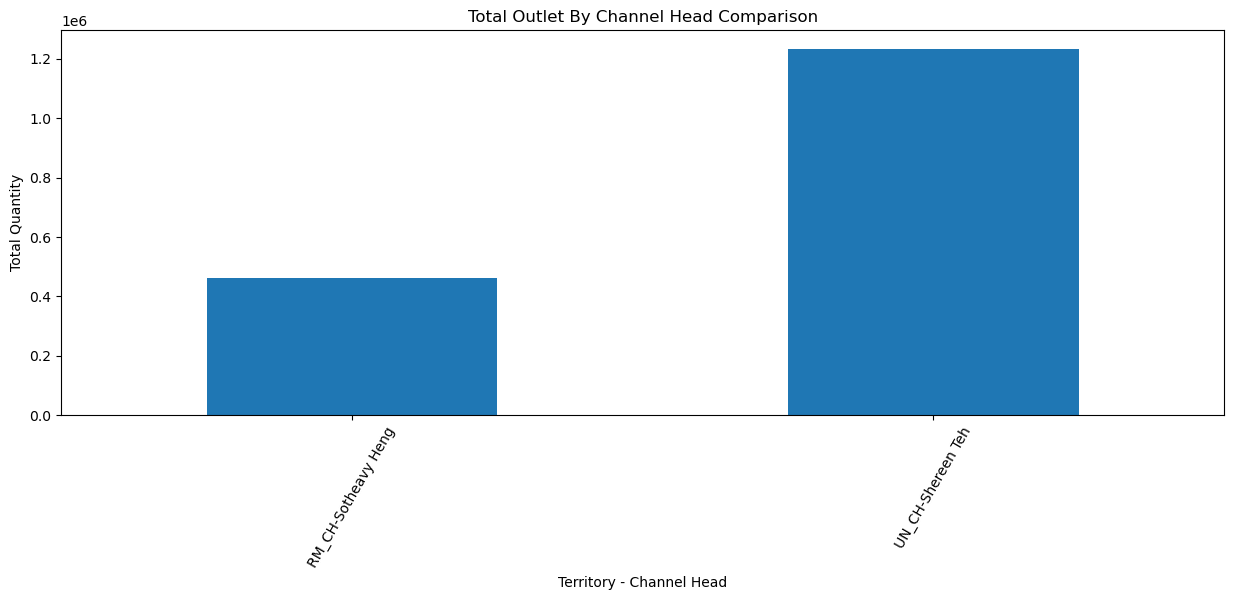

channel_head
RM_CH-Sotheavy Heng     463182.7
UN_CH-Shereen Teh      1233708.7
Name: quantity, dtype: float64

In [22]:
target_outlet_by_territory = target.groupby(['channel_head'])['quantity'].sum()
target_outlet_by_territory.to_frame().reset_index()

target_outlet_by_territory.plot(kind='bar', title='Total Outlet By Channel Head Comparison', ylabel='Total Quantity',
         xlabel='Territory - Channel Head', figsize=(15, 5))
plt.xticks(rotation='60')
plt.show()

target_outlet_by_territory

In [23]:
import plotly.graph_objects as go

labels = target.channel_head.unique()
values = target_outlet_by_territory

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.show()

In [24]:
# pivot-table-jsis a lightweight module that closely replicates the functionality of Excel and Google Sheets pivot tables. Used heavily in our internal suite of bespoke web apps that power our internal workflows, pivot-table-js allows you to apply aggregations to sets of values.
from pivottablejs import pivot_ui

pivot_ui(target)

<hr>
<h1 style="font-family:Open Sans; font-size:15px";> <center>Trade Program Performance by Segment & Geo</center></h1>
<hr>

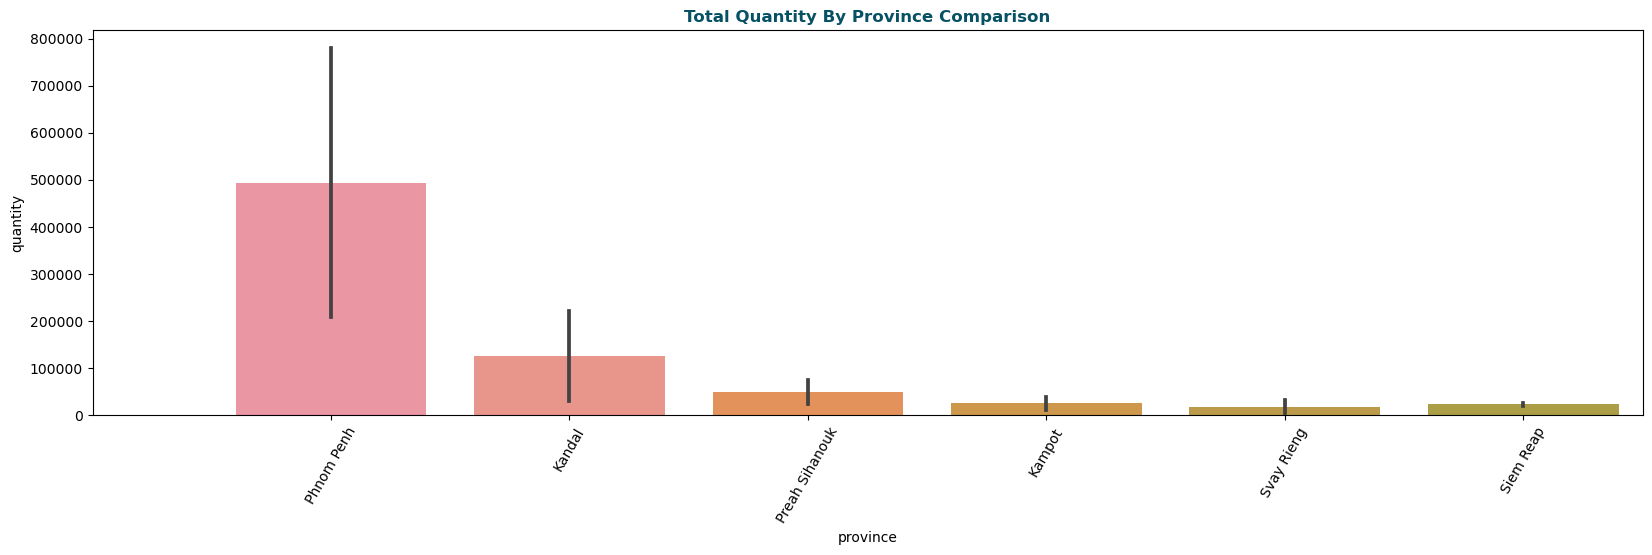

In [25]:
#group by quantity by province
quantity_by_province = target.groupby(['province', 'item_name'])['quantity'].sum().sort_values(ascending=False)
quantity_by_province = quantity_by_province.to_frame().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='province', y='quantity', data=quantity_by_province)
plt.title('Total Quantity By Province Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

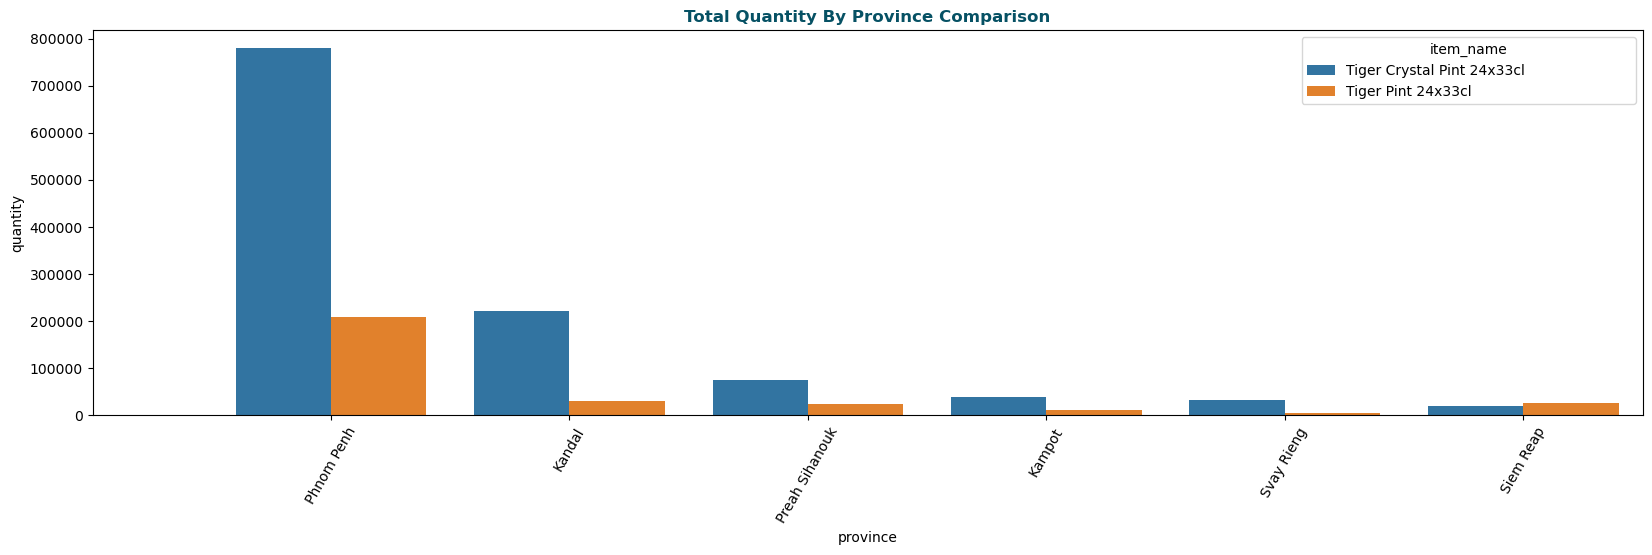

province                                          item_name  \
17  Banteay Meanchey  Tiger Pint 24x33cl                            ...   
21  Banteay Meanchey  Tiger Crystal Pint 24x33cl                    ...   
19        Battambang  Tiger Pint 24x33cl                            ...   
11        Battambang  Tiger Crystal Pint 24x33cl                    ...   
39      Kampong Cham  Tiger Pint 24x33cl                            ...   
22      Kampong Cham  Tiger Crystal Pint 24x33cl                    ...   
16   Kampong Chhnang  Tiger Crystal Pint 24x33cl                    ...   
29   Kampong Chhnang  Tiger Pint 24x33cl                            ...   
15      Kampong Speu  Tiger Crystal Pint 24x33cl                    ...   
44      Kampong Speu  Tiger Pint 24x33cl                            ...   
33      Kampong Thom  Tiger Pint 24x33cl                            ...   
20      Kampong Thom  Tiger Crystal Pint 24x33cl                    ...   
4             Kampot  Tiger Crystal Pint 24x33cl                    ...   
18            Kampot  Tiger Pint 24x33cl                            ...   
6             Kandal  Tiger Pint 24x33cl                            ...   
1             Kandal  Tiger Crystal Pint 24x33cl                    ...   
32               Kep  Tiger Crystal Pint 24x33cl                    ...   
47               Kep  Tiger Pint 24x33cl                            ...   
13          Koh Kong  Tiger Crystal Pint 24x33cl                    ...   
41          Koh Kong  Tiger Pint 24x33cl                            ...   
42            Kratie  Tiger Pint 24x33cl                            ...   
26            Kratie  Tiger Crystal Pint 24x33cl                    ...   
43        Mondulkiri  Tiger Crystal Pint 24x33cl                    ...   
45        Mondulkiri  Tiger Pint 24x33cl                            ...   
12    Oddar Meanchey  Tiger Crystal Pint 24x33cl                    ...   
40    Oddar Meanchey  Tiger Pint 24x33cl                            ...   
30            Pailin  Tiger Crystal Pint 24x33cl                    ...   
49            Pailin  Tiger Pint 24x33cl                            ...   
0         Phnom Penh  Tiger Crystal Pint 24x33cl                    ...   
2         Phnom Penh  Tiger Pint 24x33cl                            ...   
3     Preah Sihanouk  Tiger Crystal Pint 24x33cl                    ...   
8     Preah Sihanouk  Tiger Pint 24x33cl                            ...   
34      Preah Vihear  Tiger Pint 24x33cl                            ...   
35      Preah Vihear  Tiger Crystal Pint 24x33cl                    ...   
31         Prey Veng  Tiger Crystal Pint 24x33cl                    ...   
48         Prey Veng  Tiger Pint 24x33cl                            ...   
25            Pursat  Tiger Pint 24x33cl                            ...   
23            Pursat  Tiger Crystal Pint 24x33cl                    ...   
38        Ratanakiri  Tiger Crystal Pint 24x33cl                    ...   
46        Ratanakiri  Tiger Pint 24x33cl                            ...   
7          Siem Reap  Tiger Pint 24x33cl                            ...   
9          Siem Reap  Tiger Crystal Pint 24x33cl                    ...   
27       Stung Treng  Tiger Crystal Pint 24x33cl                    ...   
37       Stung Treng  Tiger Pint 24x33cl                            ...   
5         Svay Rieng  Tiger Crystal Pint 24x33cl                    ...   
28        Svay Rieng  Tiger Pint 24x33cl                            ...   
24             Takeo  Tiger Pint 24x33cl                            ...   
10             Takeo  Tiger Crystal Pint 24x33cl                    ...   
36      Tboung Khmum  Tiger Pint 24x33cl                            ...   
14      Tboung Khmum  Tiger Crystal Pint 24x33cl                    ...   

     quantity  
17   11855.67  
21    7661.88  
19   10217.02  
11   19964.06  
39    1111.50  
22    7091.45  
16   12178.91  
29    3149.22  
15   13119.04  
44     797.97  
33    2393

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(x='province', y='quantity', hue='item_name', data=quantity_by_province)
plt.title('Total Quantity By Province Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

quantity_by_province.sort_values('province')

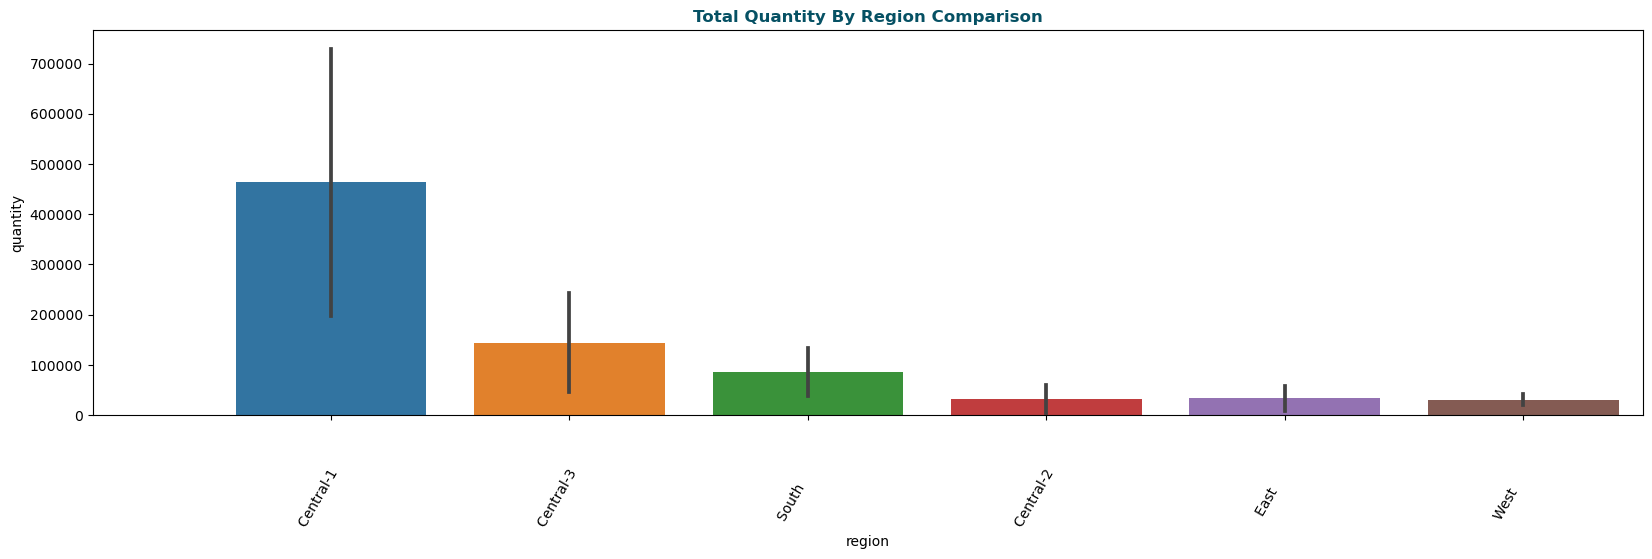

In [27]:
#group by quantity by province
quantity_by_region = target.groupby(['region', 'item_name'])['quantity'].sum().sort_values(ascending=False)
quantity_by_region = quantity_by_region.to_frame().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='region', y='quantity', data=quantity_by_region)
plt.title('Total Quantity By Region Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

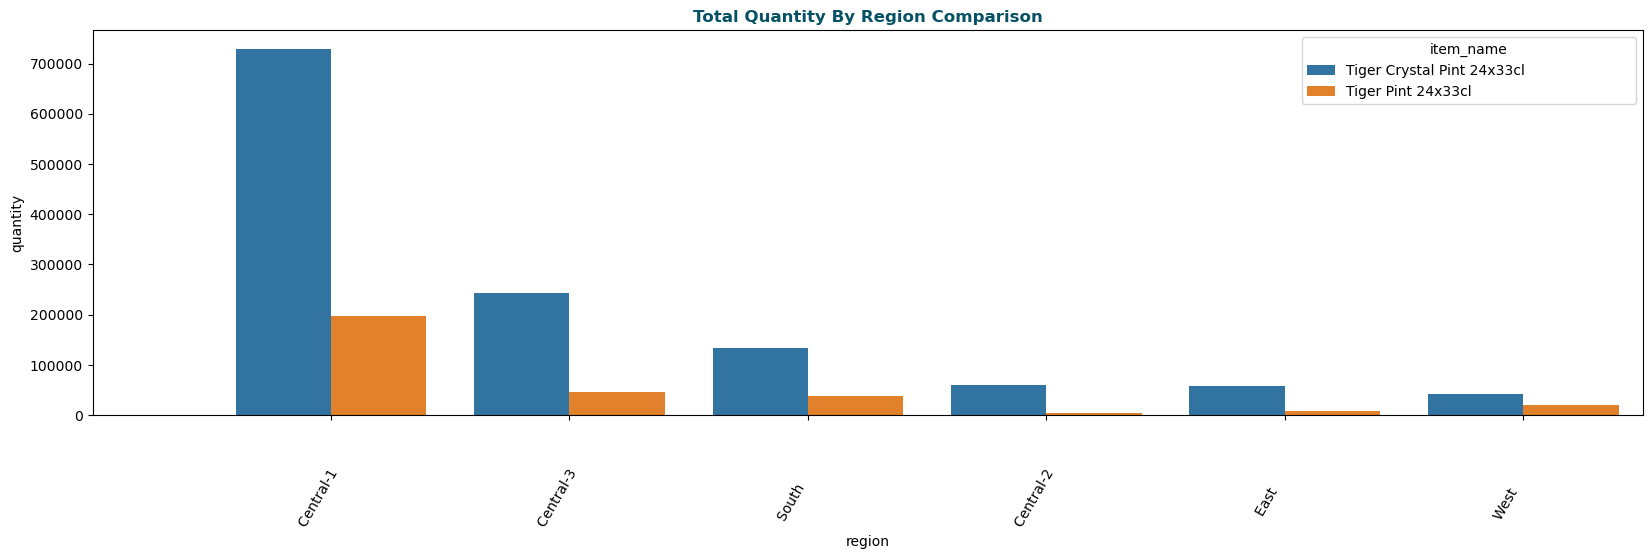

region                                          item_name  \
12  West                  Tiger Pint 24x33cl                            ...   
7   West                  Tiger Crystal Pint 24x33cl                    ...   
3   South                 Tiger Crystal Pint 24x33cl                    ...   
8   South                 Tiger Pint 24x33cl                            ...   
13  North West            Tiger Pint 24x33cl                            ...   
11  North West            Tiger Crystal Pint 24x33cl                    ...   
17  North East            Tiger Pint 24x33cl                            ...   
14  North East            Tiger Crystal Pint 24x33cl                    ...   
10  North                 Tiger Pint 24x33cl                            ...   
9   North                 Tiger Crystal Pint 24x33cl                    ...   
5   East                  Tiger Crystal Pint 24x33cl                    ...   
15  East                  Tiger Pint 24x33cl                            ...   
1   Central-3             Tiger Crystal Pint 24x33cl                    ...   
6   Central-3             Tiger Pint 24x33cl                            ...   
4   Central-2             Tiger Crystal Pint 24x33cl                    ...   
16  Central-2             Tiger Pint 24x33cl                            ...   
2   Central-1             Tiger Pint 24x33cl                            ...   
0   Central-1             Tiger Crystal Pint 24x33cl                    ...   

     quantity  
12   19436.57  
7    41670.26  
3   134243.06  
8    37518.80  
13   12967.12  
11   27456.05  
17    4075.39  
14   11315.47  
10   29693.56  
9    31887.06  
5    59089.92  
15    7666.29  
1   242706.81  
6    45187.99  
4    60723.80  
16    4488.58  
2   196870.91  
0   729893.76

In [28]:
plt.figure(figsize=(20,5))
sns.barplot(x='region', y='quantity', hue='item_name', data=quantity_by_region)
plt.title('Total Quantity By Region Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

quantity_by_region.sort_values('region', ascending=False)

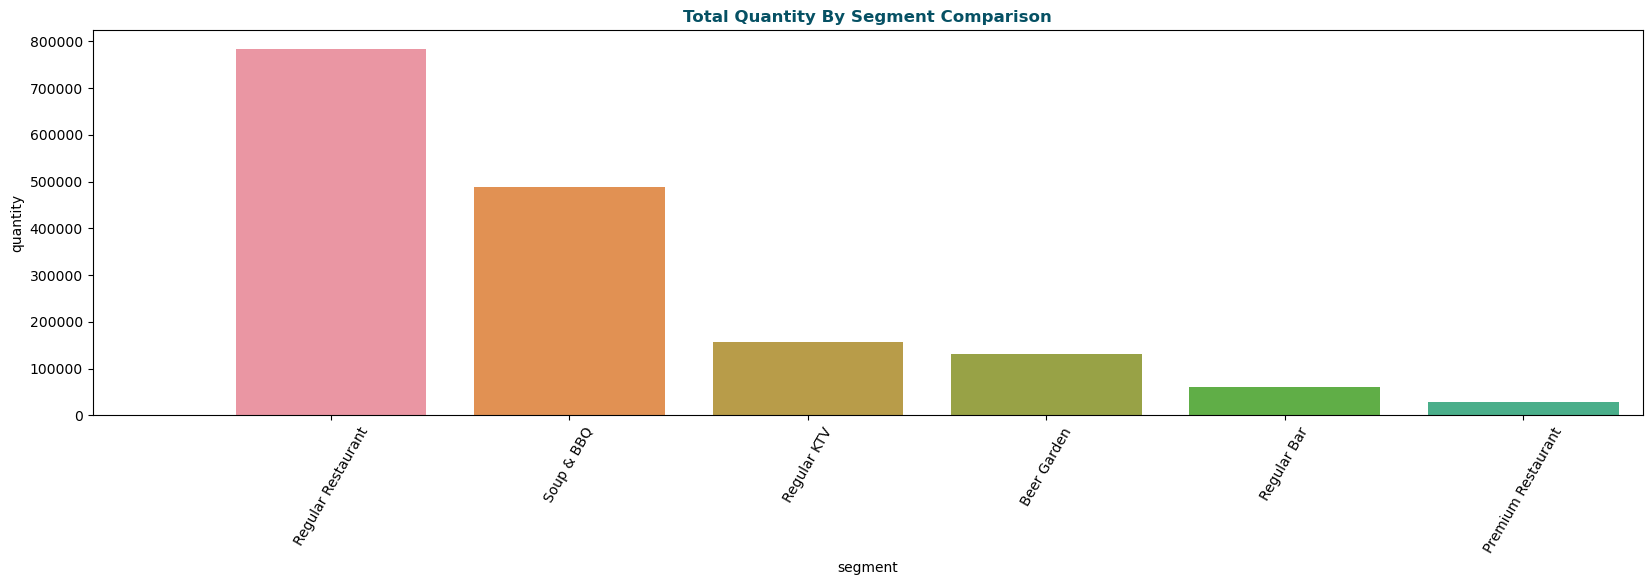

segment   quantity
0   Regular Restaurant  784347.34
1           Soup & BBQ  488995.67
2          Regular KTV  157889.40
3          Beer Garden  130122.19
4          Regular Bar   61121.91
5   Premium Restaurant   27924.53
6                  PUB   25157.94
7                 Club   11460.58
8   Chinese Restaurant    5828.07
9          Premium KTV    3458.88
10      Hotel 3-5 Star     385.40
11         Guest House     199.49

In [29]:
#group by quantity by province
quantity_by_segment = target.groupby(['segment'])['quantity'].sum().sort_values(ascending=False)
quantity_by_segment = quantity_by_segment.to_frame().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='segment', y='quantity', data=quantity_by_segment)
plt.title('Total Quantity By Segment Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

quantity_by_segment.sort_values('quantity', ascending=False)

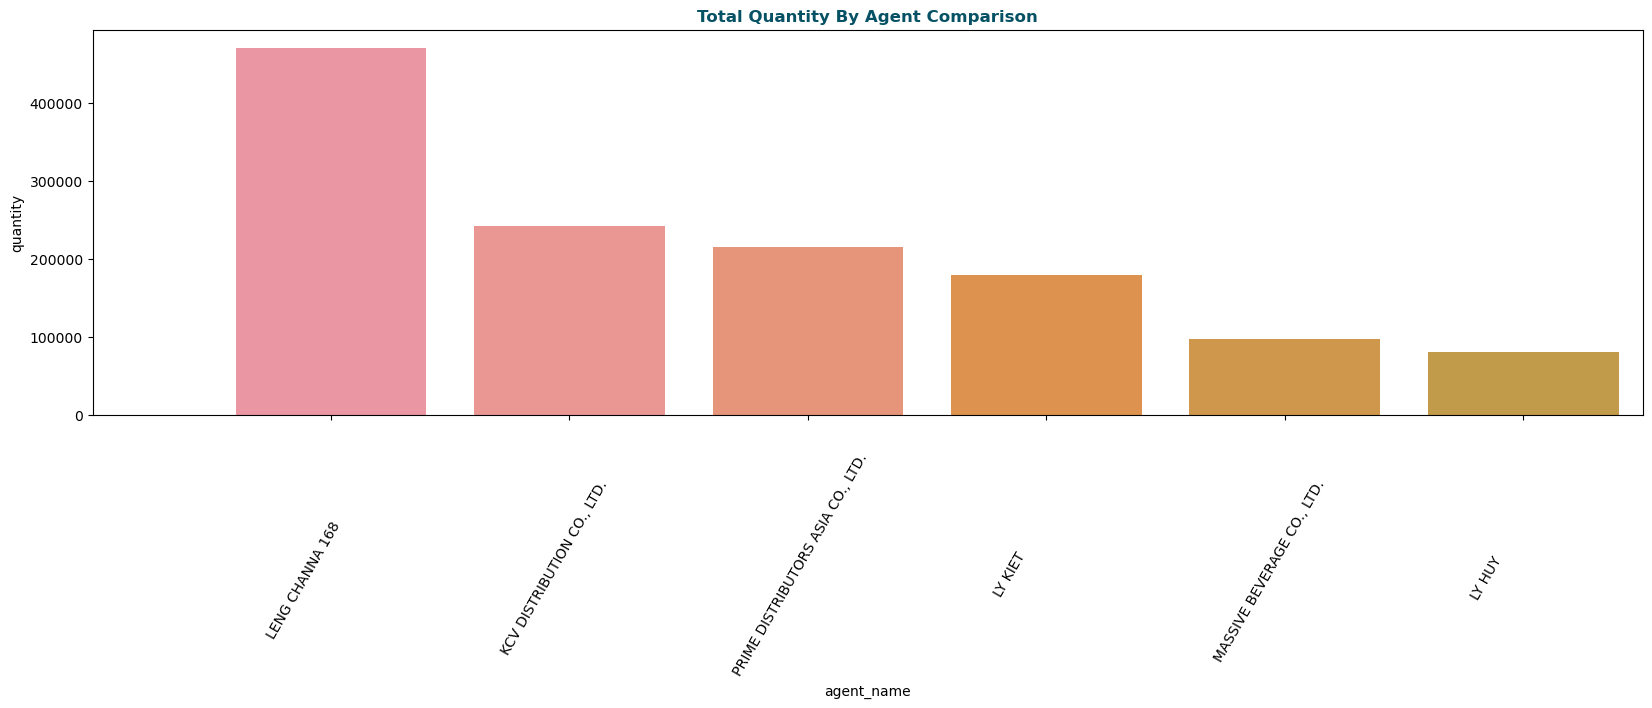

agent_name   quantity
0   LENG CHANNA 168                           470143.90
1   KCV DISTRIBUTION CO., LTD.                241807.39
2   PRIME DISTRIBUTORS ASIA CO., LTD.         214813.38
3   LY KIET                                   178951.07
4   MASSIVE BEVERAGE CO., LTD.                 97727.55
5   LY HUY                                     80198.57
6   DEPOT LIM TRY KPS                          65212.38
7   DY KP                                      53842.73
8   DEPOT TAN LI VENG                          45274.80
9   SAING RATHYDA BEER DISTRIBUTOR             35702.07
10  SORN THANG SHOP                            28745.16
11  TIGER DEPOT                                23540.74
12  LONG CHYVORN                               20905.62
13  SOK LENG                                   18619.15
14  Khun Nhor                                  16174.48
15  SEANG HAK                                  15328.13
16  MOM THEA PURSAT                            12559.17
17  DEPOT LONG KUNTHEA                         12121.62
18  TOUCH BUN RIN SELLS BEVERAGE               10316.75
19  HENG CHEA HEANG                             9678.79
20  HORT NARIN                                  9200.80
21  NHAR VENG TIGER BEER DISTRIBUTOR            6884.17
22  LAY EANG HENG                               6327.78
23  SENG CHAKREYA                               4184.20
24  HUY LY                                      3845.69
25  LIM TRY                                     3234.60
26  PHARA SONITA                                2616.62
27  LY VANNARA                                  1801.00
28  HUY CHAN                                    1665.93
29  KY TAN                                      1572.43
30  KIM CHINDA AGENT                            1411.28
31  NHOR SOKLANG                                1017.46
32  PHAI REAKSMEY Sell Beer                      733.00
33  LENG PISEY                                   732.99

In [30]:
#group by quantity by province
quantity_by_agent = target.groupby(['agent_name'])['quantity'].sum().sort_values(ascending=False)
quantity_by_agent = quantity_by_agent.to_frame().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='agent_name', y='quantity', data=quantity_by_agent)
plt.title('Total Quantity By Agent Comparison', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

quantity_by_agent.sort_values('quantity', ascending=False)

<h1 style="font-family:Open Sans; font-size:30px";><center>TPO - Advance Analytics </center></h1>

In [31]:
#feature engineering 
#aa_data = target['hectoliter', 'gross_amount', 'latitude', 'longitude']
aa_data = target.loc[:, ['hectoliter', 'gross_amount']]
aa_data = aa_data[aa_data['hectoliter'] > 0]
aa_data = aa_data[aa_data['gross_amount'] > 0]

In [32]:
#check info
aa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5690 entries, 0 to 5767
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hectoliter    5690 non-null   float64
 1   gross_amount  5690 non-null   float64
dtypes: float64(2)
memory usage: 133.4 KB


In [33]:
#drop null values 
aa_data.dropna(inplace=True)

In [34]:
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
#define wcss to store inertia of kmeans data points, it's empty list


from sklearn.cluster import KMeans

#Within-Cluster Sum of Square
wcss = []

#now we define K=5
for i in range(1,11):
    #call kmean model object
    model_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    #train kmean model
    model_kmeans.fit(aa_data)
    #append values to list
    wcss.append(model_kmeans.inertia_)

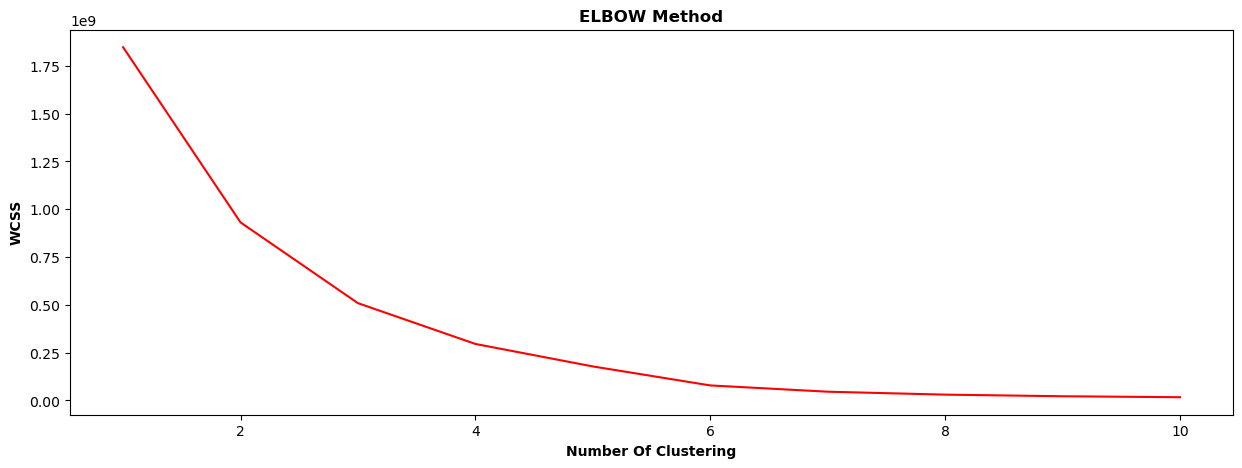

In [35]:
#we use ELBOW method to find the best K values
#let see
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss, color='r')
plt.title("ELBOW Method", fontweight='bold')
plt.xlabel("Number Of Clustering",fontweight='bold')
plt.ylabel("WCSS",fontweight='bold')
plt.show()

#as we can see on this graph
#the best k value is 
#5

In [36]:
#let build the kmeans model 
# Finally we got that k=3

kmean_model = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [37]:
kmean_model

KMeans(n_clusters=3, random_state=0)

In [38]:
#define a variable to predict 
y_pred = kmean_model.fit_predict(aa_data)
y_pred[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [39]:
aa_data['cluster'] = y_pred

# get centroids
centroids = kmean_model.cluster_centers_

cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
#cen_z = [i[2] for i in centroids]
#cen_o = [i[3] for i in centroids]

## add to df
aa_data['cen_x'] = aa_data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
aa_data['cen_y'] = aa_data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
#aa_data['cen_z'] = aa_data.cluster.map({0:cen_z[0], 1:cen_z[1], 2:cen_z[2]})
#aa_data['cen_o'] = aa_data.cluster.map({0:cen_o[0], 1:cen_o[1], 2:cen_o[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
aa_data['colour'] = aa_data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [40]:
#see
aa_data

hectoliter  gross_amount  cluster     cen_x        cen_y   colour
0         4.2768        832.47        0  5.540351  1065.832229  #DF2020
1         1.4256        277.49        1  0.743721   141.449067  #81DF20
2         2.8512        554.98        1  0.743721   141.449067  #81DF20
3         0.4752         92.50        1  0.743721   141.449067  #81DF20
4         2.8512        554.98        1  0.743721   141.449067  #81DF20
...          ...           ...      ...       ...          ...      ...
5763      0.7920        142.49        1  0.743721   141.449067  #81DF20
5764      0.3960         77.08        1  0.743721   141.449067  #81DF20
5765      0.2376         42.75        1  0.743721   141.449067  #81DF20
5766      0.2376         46.25        1  0.743721   141.449067  #81DF20
5767      0.7920        154.16        1  0.743721   141.449067  #81DF20

[5690 rows x 6 columns]

In [41]:
#check the count number of clustering 
aa_data.cluster.value_counts()

1    4864
0     803
2      23
Name: cluster, dtype: int64

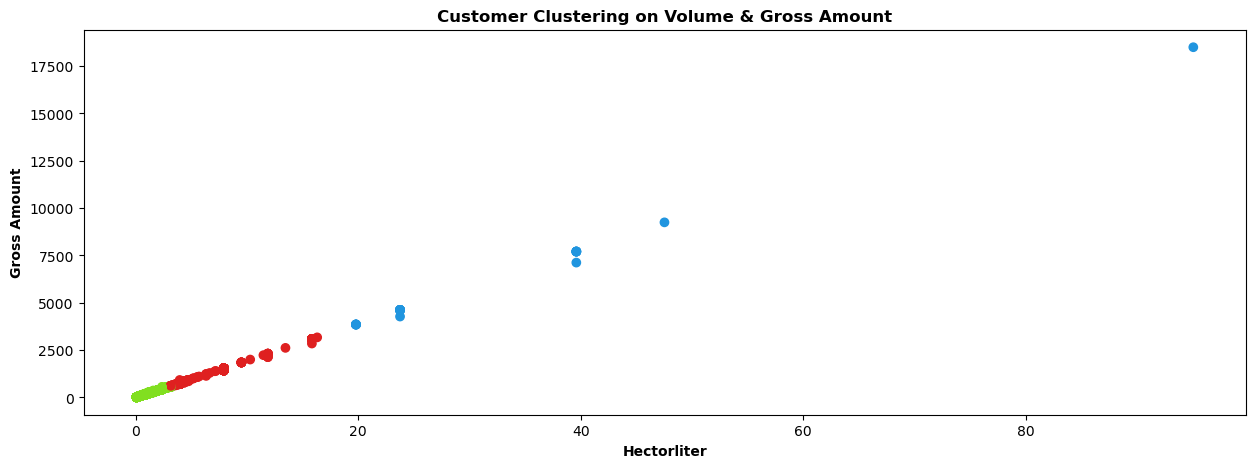

In [42]:

#we use ELBOW method to find the best K values
#let see
plt.figure(figsize=(15,5))
plt.scatter(aa_data.hectoliter, aa_data.gross_amount, c=aa_data.colour, alpha = 1)
plt.title("Customer Clustering on Volume & Gross Amount", fontweight='bold')
plt.xlabel("Hectorliter",fontweight='bold')
plt.ylabel("Gross Amount",fontweight='bold')
plt.show()

#as we can see on this graph
#the best k value is 
#5

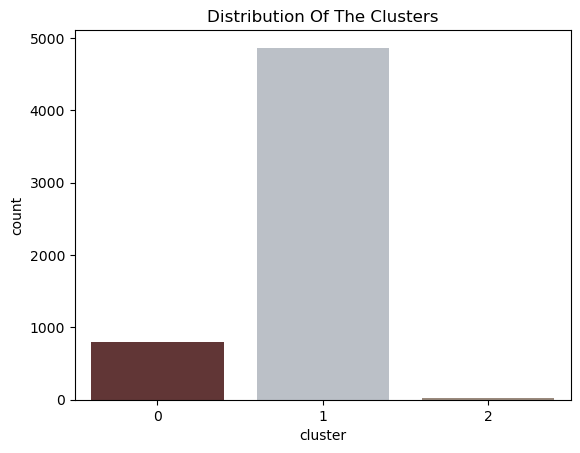

In [43]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=aa_data["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

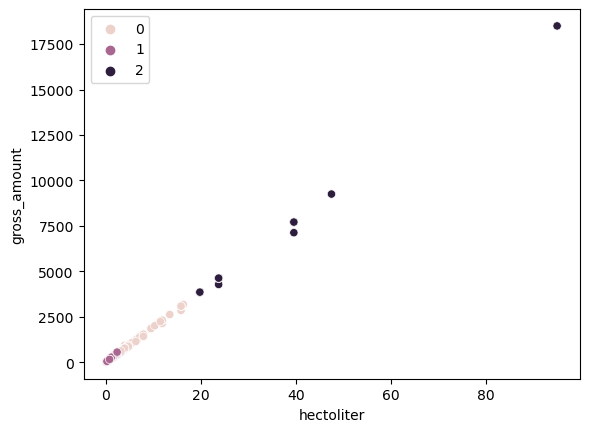

In [44]:
pl = sns.scatterplot(data = aa_data,x=aa_data["hectoliter"], y=aa_data["gross_amount"], hue=aa_data["cluster"])
plt.legend()
plt.show()

<h1 style="font-family:Open Sans; font-size:30px";><center>TOP Performers Behaviours Analysis</center></h1>

In [45]:
#group by quantity by province
top_performers = target.groupby(['outlet_code'])['hectoliter', 'gross_amount'].sum().sort_values(by='gross_amount', ascending=False)
print(type(top_performers))
top_performers = top_performers.reset_index()


<class 'pandas.core.frame.DataFrame'>


In [46]:
top_performers_100 = top_performers.head(100)
top_performers_100

outlet_code  hectoliter  gross_amount
0      78005864    194.4360      36579.29
1      71010383    153.0144      29760.46
2      71315898    142.9560      26435.49
3      79005943    201.9600      23836.51
4      71012781     95.0400      18499.26
..          ...         ...           ...
95     71005517     22.2552       4324.90
96     71417127     22.4928       4318.65
97     79006108     22.1760       4316.48
98     71415737     21.7800       4239.40
99     78021605     21.7008       4217.01

[100 rows x 3 columns]

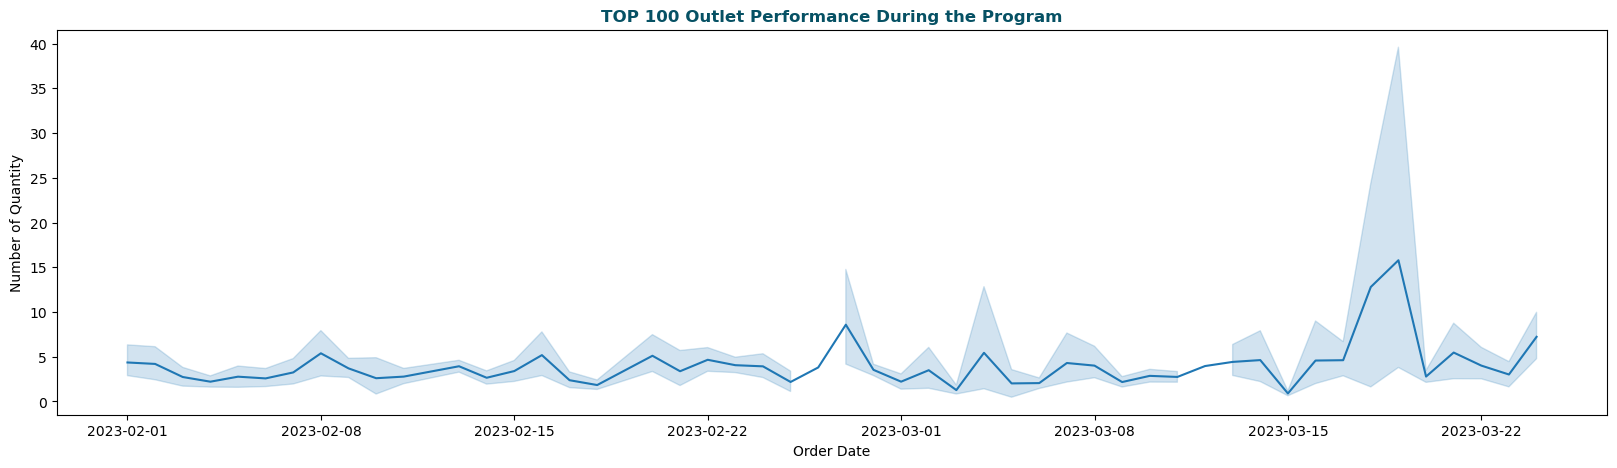

In [84]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=top_performers_100, x="order_date", y="hectoliter_y", legend='auto')

plt.title('TOP 100 Outlet Performance During the Program',fontsize='12', fontweight='bold', color='#065164')
plt.xlabel('Order Date')
plt.ylabel('Number of Quantity')
#plt.legend()
plt.show()

In [83]:
top_performers_100.describe()

agent_code  ams_hcam_premium_brand  ams_hcam_mainstream_brand  \
count  1.173000e+03             1145.000000                1145.000000   
mean   1.022637e+07              111.392140                 147.882969   
std    1.147076e+05              158.332711                 228.386596   
min    1.002119e+07                0.000000                   0.000000   
25%    1.015752e+07               15.000000                  40.000000   
50%    1.029058e+07               40.000000                  80.000000   
75%    1.029058e+07              150.000000                 150.000000   
max    1.033216e+07              700.000000                1190.000000   

       ams_competitor_premium_brand  ams_competitor_mainstream_brand  \
count                   1145.000000                      1145.000000   
mean                      38.207860                        68.030568   
std                       64.148923                       104.434558   
min                        0.000000                         0.000000   
25%                        5.000000                        20.000000   
50%                       10.000000                        30.000000   
75%                       50.000000                        70.000000   
max                      300.000000                       500.000000   

          item_code      quantity  hectoliter_y        amount  gross_amount_y  \
count  1.173000e+03   1173.000000   1173.000000   1173.000000     1173.000000   
mean   1.000425e+07    698.509113      3.656299    619.544425      681.498593   
std    3.936935e+02   1057.278616      5.468216    971.210464     1068.331760   
min    1.000366e+07      0.000000      0.079200  -6477.010000    -7124.710000   
25%    1.000366e+07    142.490000      0.792000    129.540000      142.490000   
50%    1.000451e+07    462.480000      2.376000    420.440000      462.480000   
75%    1.000451e+07    770.800000      3.960000    700.730000      770.800000   
max    1.000451e+07  18499.260000     95.040000  16817.510000    18499.260000   

          item_code     latitude    longitude  
count  1.173000e+03  1173.000000  1173.000000  
mean   1.000425e+07    11.599964   104.813869  
std    3.936935e+02     0.494241     0.509040  
min    1.000366e+07    10.579050   102.951550  
25%    1.000366e+07    11.537750   104.891310  
50%    1.000451e+07    11.564850   104.919220  
75%    1.000451e+07    11.577640   104.927590  
max    1.000451e+07    14.183560   106.187450

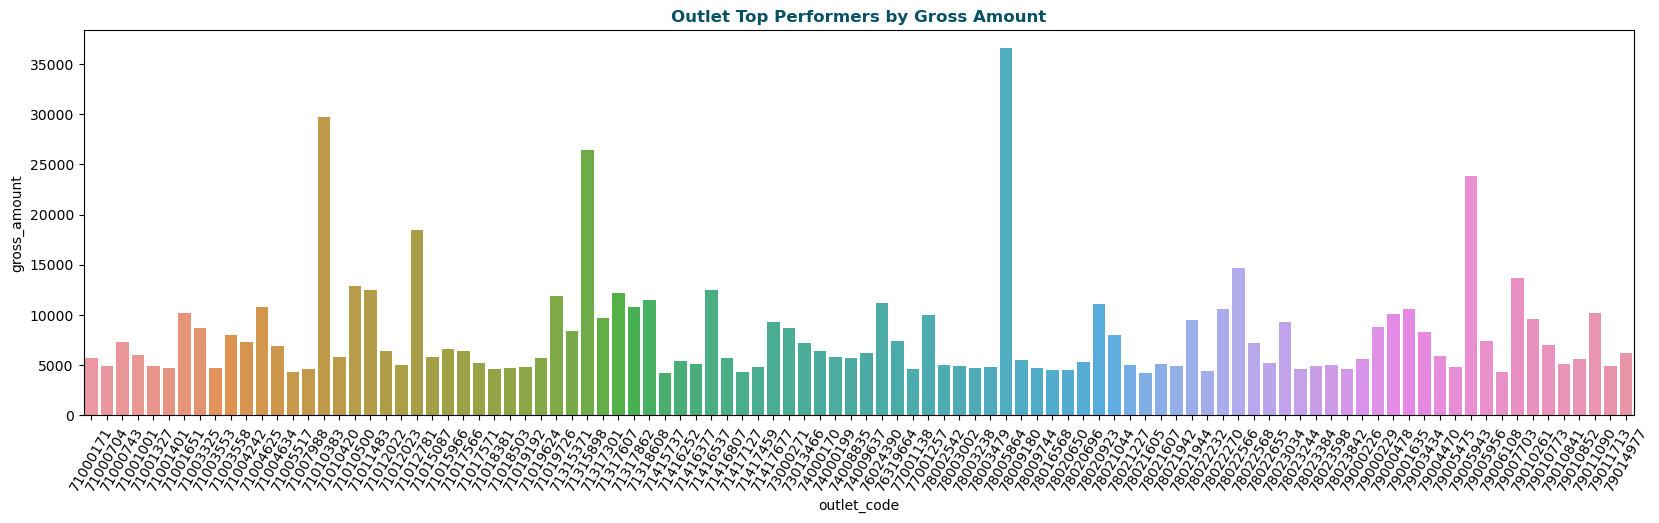

In [47]:
plt.figure(figsize=(20,5))
sns.barplot(x='outlet_code', y='gross_amount', data=top_performers_100.sort_values(by='gross_amount', ascending=False))
plt.title('Outlet Top Performers by Gross Amount', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
#plt.xlim(-1,5.5)
plt.show()

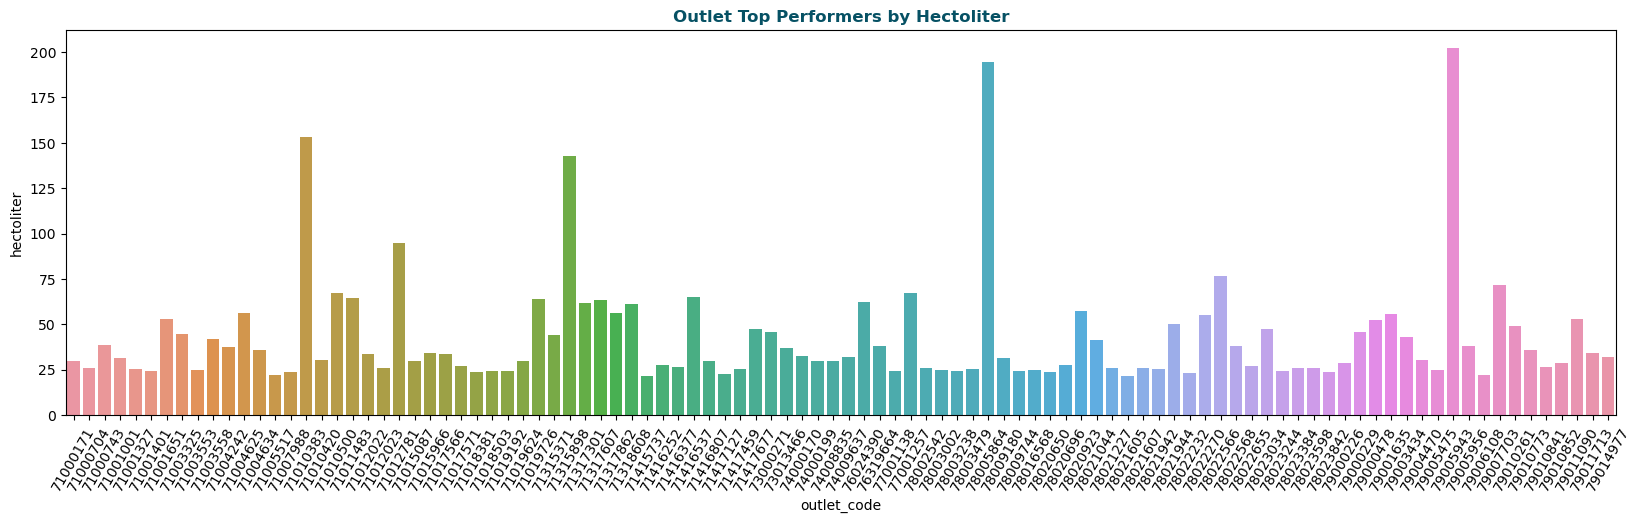

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x='outlet_code', y='hectoliter', data=top_performers_100.sort_values(by='gross_amount', ascending=False))
plt.title('Outlet Top Performers by Hectoliter', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
#plt.xlim(-1,5.5)
plt.show()

In [49]:
top_performers_100.tail()

outlet_code  hectoliter  gross_amount
95     71005517     22.2552       4324.90
96     71417127     22.4928       4318.65
97     79006108     22.1760       4316.48
98     71415737     21.7800       4239.40
99     78021605     21.7008       4217.01

In [50]:
#join the sample with the population  

top_performers_100 = top_performers_100.merge(target,how="left",on="outlet_code")
top_performers_100.drop(['outlet_code', 'hectoliter_x', 'gross_amount_x'], axis=1, inplace=True)
top_performers_100.head()

agent_code                                agent_name outlet_name_kh  \
0    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.          តារាសាច់អាំង   
1    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.          តារាសាច់អាំង   
2    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.          តារាសាច់អាំង   
3    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.          តារាសាច់អាំង   
4    10332162  PRIME DISTRIBUTORS ASIA CO., LTD.          តារាសាច់អាំង   

  outlet_name_english                region    province account_type  status  \
0            DARA BBQ  Central-1             Phnom Penh       Outlet  Active   
1            DARA BBQ  Central-1             Phnom Penh       Outlet  Active   
2            DARA BBQ  Central-1             Phnom Penh       Outlet  Active   
3            DARA BBQ  Central-1             Phnom Penh       Outlet  Active   
4            DARA BBQ  Central-1             Phnom Penh       Outlet  Active   

    grade        city    district      commune  village          cluster_lead  \
0  Attack  Phnom Penh  Russey Keo  Tuol Sangke  Unknown  Urban Traditional On   
1  Attack  Phnom Penh  Russey Keo  Tuol Sangke  Unknown  Urban Traditional On   
2  Attack  Phnom Penh  Russey Keo  Tuol Sangke  Unknown  Urban Traditional On   
3  Attack  Phnom Penh  Russey Keo  Tuol Sangke  Unknown  Urban Traditional On   
4  Attack  Phnom Penh  Russey Keo  Tuol Sangke  Unknown  Urban Traditional On   

      segment business_org_segment business_segment  category  \
0  Soup & BBQ    Traditional Trade         On Trade  Platinum   
1  Soup & BBQ    Traditional Trade         On Trade  Platinum   
2  Soup & BBQ    Traditional Trade         On Trade  Platinum   
3  Soup & BBQ    Traditional Trade         On Trade  Platinum   
4  Soup & BBQ    Traditional Trade         On Trade  Platinum   

          channel_name outlet_credit_status  ams_hcam_premium_brand  \
0  Restaurant / Tavern               Credit                   300.0   
1  Restaurant / Tavern               Credit                   300.0   
2  Restaurant / Tavern               Credit                   300.0   
3  Restaurant / Tavern            No Credit                   300.0   
4  Restaurant / Tavern            No Credit                   300.0   

   ams_hcam_mainstream_brand  ams_competitor_premium_brand  \
0                      100.0                         100.0   
1                      100.0                         100.0   
2                      100.0                         100.0   
3                      100.0                         100.0   
4                      100.0                         100.0   

   ams_competitor_mainstream_brand order_type document_number document_type  \
0                             50.0         SO     PDA-0038592          Sale   
1                             50.0         SO     PDA-0038592          Sale   
2                             50.0         SO     PDA-0038803          Sale   
3                             50.0        S6+     PDA-0036769        Gratis   
4                             50.0         SO     PDA-0030832          Sale   

  contract_type      order_category  item_code  quantity  hectoliter_y  \
0         Promo    Sale Transaction   10003660    712.47         3.960   
1         Promo    Sale Transaction   10004510    616.64         3.168   
2         Promo    Sale Transaction   10004510   4624.81        23.760   
3         Promo  Gratis Transaction   10003660      0.00         0.396   
4         Promo    Sale Transaction   10003660    712.47         3.960   

    amount  gross_amount_y  item_code  \
0   647.70          712.47   10003660   
1   560.58          616.64   10004510   
2  4204.37         4624.81   10004510   
3     0.00            0.00   10003660   
4   647.70          712.47   10003660   

                                           item_name  latitude  longitude  \
0  Tiger Pint 24x33cl                            ...  11.59844  104.90857   
1  Tiger Crystal Pint 24x33cl                    ...  11.59844  104.90857   
2

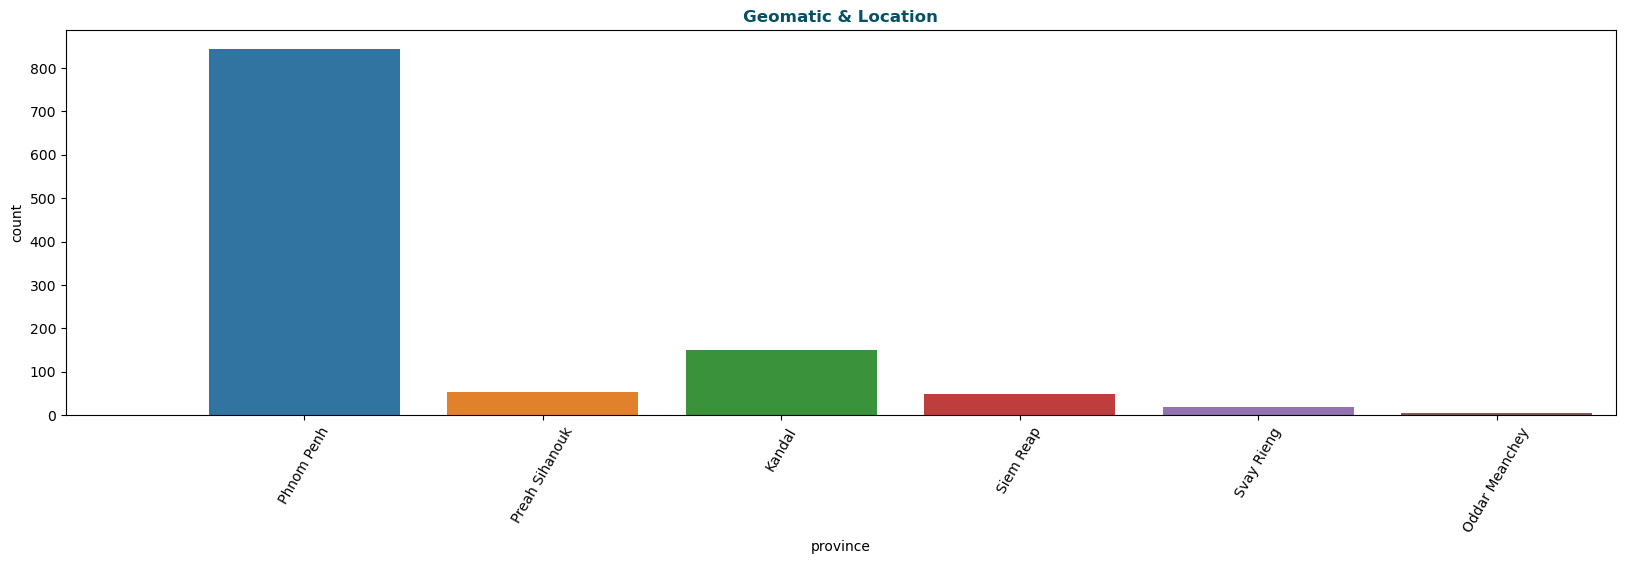

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(x='province', data=top_performers_100)
plt.title('Geomatic & Location', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()


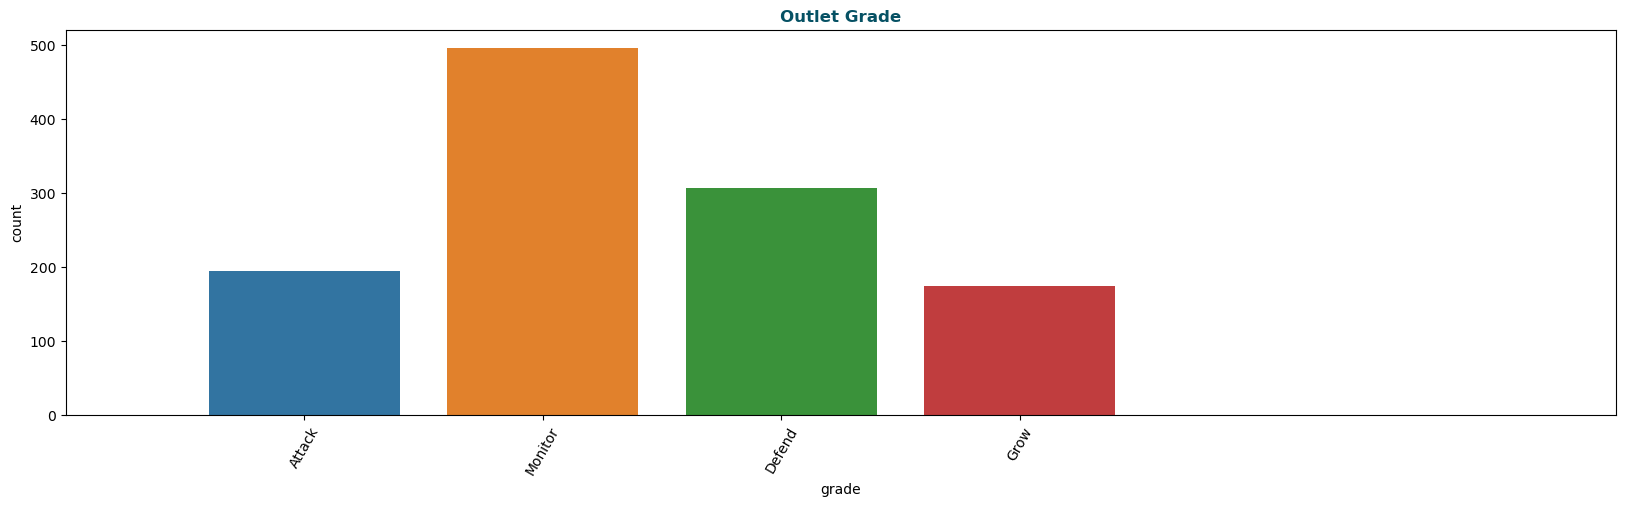

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(x='grade', data=top_performers_100)
plt.title('Outlet Grade', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()


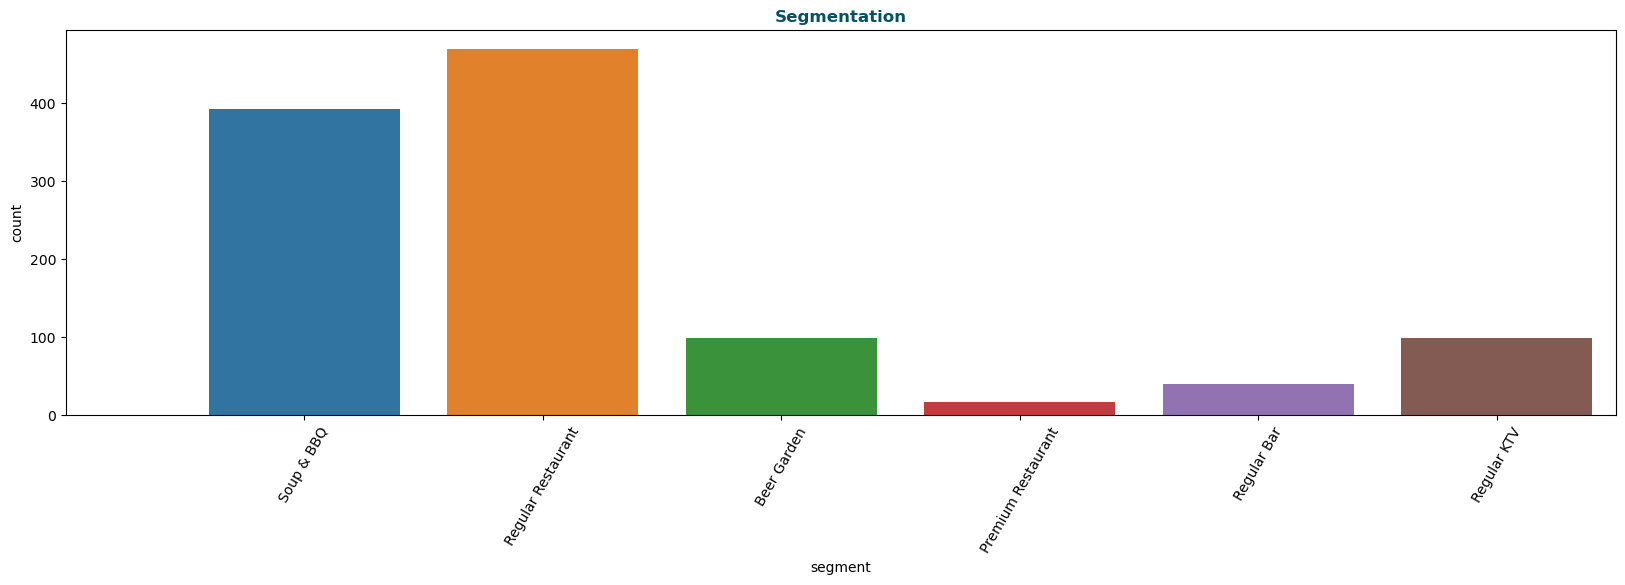

In [53]:
plt.figure(figsize=(20,5))
sns.countplot(x='segment', data=top_performers_100)
plt.title('Segmentation', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()


<h1 style="font-family:Open Sans; font-size:30px";><center>Bottom Performers Behaviours Analysis</center></h1>

In [59]:
#group by quantity by province
bottom_performers = target.groupby(['outlet_code'])['hectoliter', 'gross_amount'].sum().sort_values(by='gross_amount', ascending=False)
bottom_performers = bottom_performers.reset_index()
print(type(bottom_performers))

<class 'pandas.core.frame.DataFrame'>


In [61]:
bottom_performers_100 = bottom_performers.tail(100)
bottom_performers_100

outlet_code  hectoliter  gross_amount
1019     79008531      0.4752         92.50
1020     76008140      0.4752         92.50
1021     75003911      0.4752         92.50
1022     78001710      0.4752         92.50
1023     79002322      0.4752         92.50
...           ...         ...           ...
1114     71003059      0.0792         15.42
1115     79000568      0.0792         14.25
1116     78023216      0.0792         14.25
1117     79002358      1.5840          0.00
1118     79010828      0.1584          0.00

[100 rows x 3 columns]

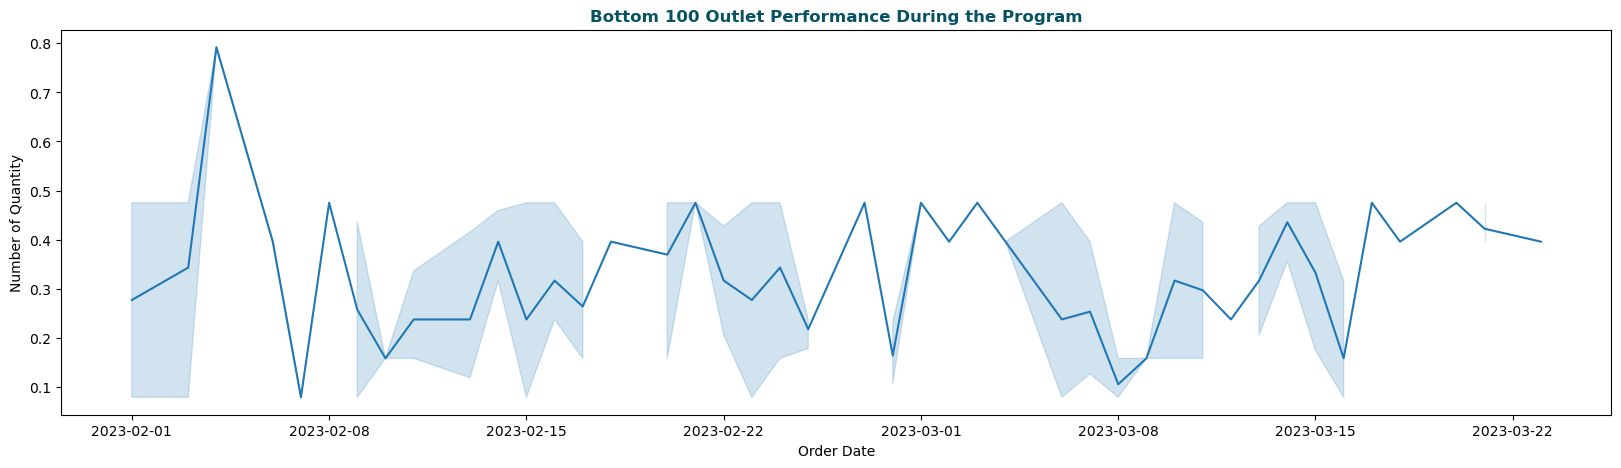

In [85]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=bottom_performers_100, x="order_date", y="hectoliter_y", legend='auto')

plt.title('Bottom 100 Outlet Performance During the Program',fontsize='12', fontweight='bold', color='#065164')
plt.xlabel('Order Date')
plt.ylabel('Number of Quantity')
#plt.legend()
plt.show()

In [82]:
bottom_performers_100.describe()

agent_code  ams_hcam_premium_brand  ams_hcam_mainstream_brand  \
count  1.280000e+02              125.000000                 125.000000   
mean   1.010599e+07               34.144000                  80.392000   
std    1.183671e+05               58.402345                 113.299126   
min    1.002119e+07                0.000000                   0.000000   
25%    1.002120e+07                8.000000                  20.000000   
50%    1.002121e+07               15.000000                  40.000000   
75%    1.017050e+07               35.000000                 100.000000   
max    1.033216e+07              350.000000                 700.000000   

       ams_competitor_premium_brand  ams_competitor_mainstream_brand  \
count                    125.000000                        125.00000   
mean                      16.944000                         39.10400   
std                       30.567299                         54.03267   
min                        0.000000                          0.00000   
25%                        3.000000                         10.00000   
50%                        5.000000                         25.00000   
75%                       20.000000                         50.00000   
max                      200.000000                        320.00000   

          item_code    quantity  hectoliter_y      amount  gross_amount_y  \
count  1.280000e+02  128.000000    128.000000  128.000000      128.000000   
mean   1.000414e+07   55.925156      0.299475   46.945313       51.640156   
std    4.224301e+02   32.400660      0.169527   35.377379       38.914642   
min    1.000366e+07    0.000000      0.079200 -129.540000     -142.490000   
25%    1.000366e+07   28.500000      0.158400   25.910000       28.500000   
50%    1.000451e+07   58.750000      0.316800   42.050000       46.250000   
75%    1.000451e+07   85.500000      0.475200   77.730000       85.500000   
max    1.000451e+07  142.490000      0.792000  129.540000      142.490000   

          item_code    latitude   longitude  
count  1.280000e+02  127.000000  127.000000  
mean   1.000414e+07   12.378391  104.183984  
std    4.224301e+02    1.026234    1.107528  
min    1.000366e+07   10.478070  102.457390  
25%    1.000366e+07   11.538990  103.140565  
50%    1.000451e+07   12.451130  104.328170  
75%    1.000451e+07   13.398170  104.902015  
max    1.000451e+07   13.798460  107.199580

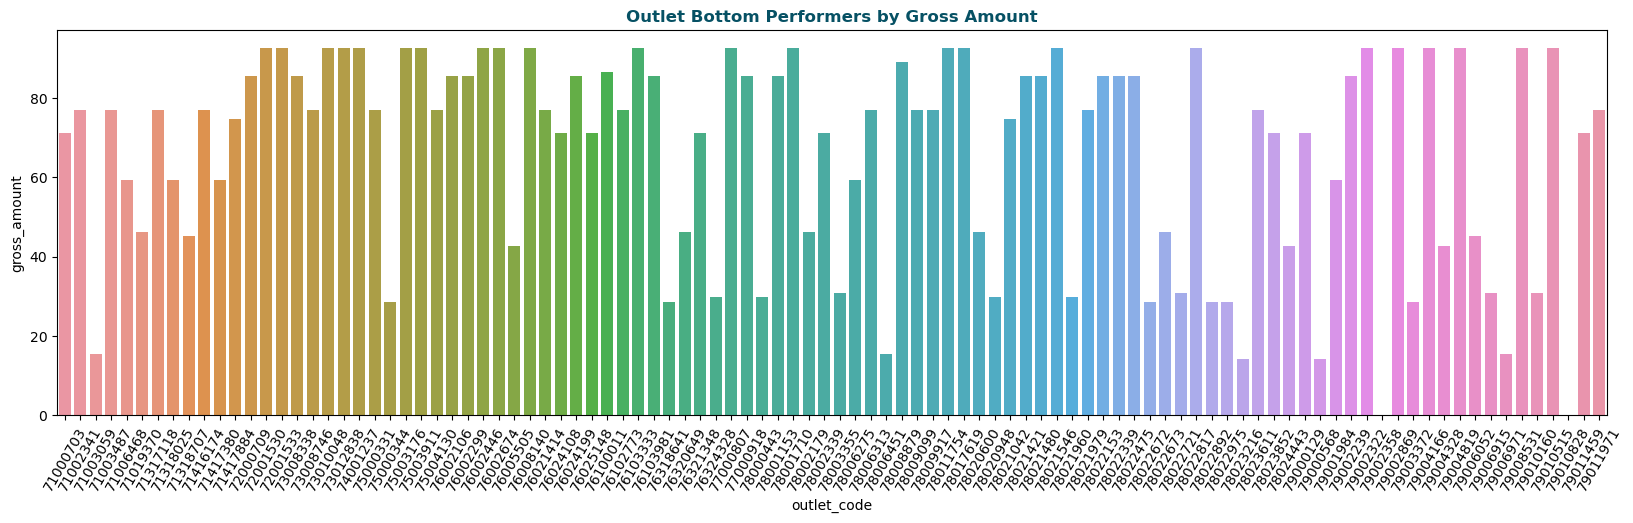

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x='outlet_code', y='gross_amount', data=bottom_performers_100.sort_values(by='gross_amount', ascending=False))
plt.title('Outlet Bottom Performers by Gross Amount', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
#plt.xlim(-1,5.5)
plt.show()

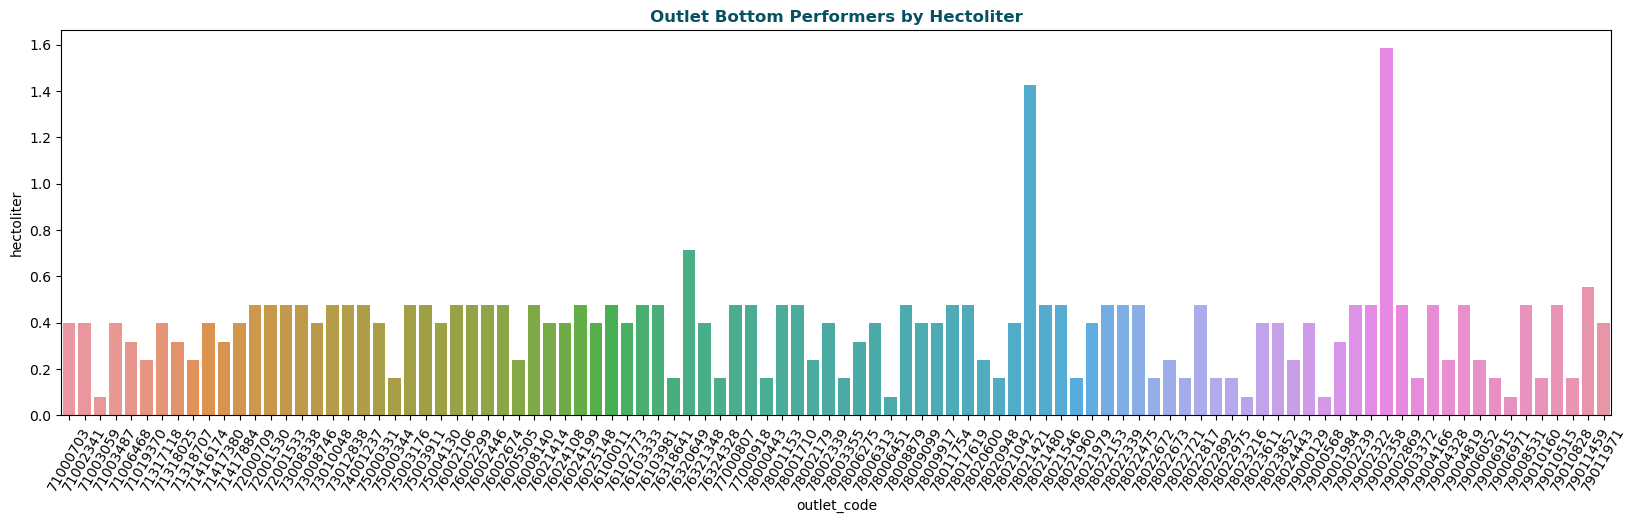

In [64]:
plt.figure(figsize=(20,5))
sns.barplot(x='outlet_code', y='hectoliter', data=bottom_performers_100.sort_values(by='gross_amount', ascending=False))
plt.title('Outlet Bottom Performers by Hectoliter', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
#plt.xlim(-1,5.5)
plt.show()

In [66]:
#join the sample with the population  

bottom_performers_100 = bottom_performers_100.merge(target,how="left",on="outlet_code")
bottom_performers_100.drop(['outlet_code', 'hectoliter_x', 'gross_amount_x'], axis=1, inplace=True)
bottom_performers_100.head()

agent_code                                agent_name  \
0    10021198  DY KP                                      
1    10021215  DEPOT LONG KUNTHEA                         
2    10021211  LAY EANG HENG                              
3    10021193  SORN THANG SHOP                            
4    10021201  TIGER DEPOT                                

                         outlet_name_kh                outlet_name_english  \
0                          សុខ គន្ធា777                     SOK KUNTHEA777   
1                             ហេង ប្រុស                          HENG BROS   
2                       សាច់អាំងកូនច្បង                  SACH ANG KONJBONG   
3                     ដេីម​​ត្នោតពីដេីម                 DEUM THNORT2 DEURM   
4  តារានីសាច់អាំងទឹកកាពិ សាខា(ផ្លូវ203)  DARANY SACH ANG TOEK KAPI(ST.203)   

                 region      province account_type  status    grade  \
0  South                          Kep       Outlet  Active  Monitor   
1  North                 Kampong Thom       Outlet  Active  Monitor   
2  North East             Stung Treng       Outlet  Active     Grow   
3  Central-3                    Takeo       Outlet  Active  Monitor   
4  West                    Battambang       Outlet  Active  Monitor   

          city       district              commune       village  \
0          NaN           Kaeb                 Kaeb          Kaeb   
1   Stung Saen         Stoung  Kampong Chen Cheung         Tnaot   
2  Stung Treng  Stueng Traeng         Srah Ruessei      Srae Pou   
3    Doun Kaev       Tram Kak         Angk Ta Saom  Angk Ta Saom   
4   Battambang     Battambang             Rottanak     Rumchek 4   

           cluster_lead             segment business_org_segment  \
0  Rural Traditional On  Regular Restaurant    Traditional Trade   
1  Rural Traditional On          Soup & BBQ    Traditional Trade   
2  Rural Traditional On          Soup & BBQ    Traditional Trade   
3  Rural Traditional On          Soup & BBQ    Traditional Trade   
4  Urban Traditional On          Soup & BBQ    Traditional Trade   

  business_segment category         channel_name outlet_credit_status  \
0         On Trade   Bronze             On Trade            No Credit   
1         On Trade   Bronze             On Trade            No Credit   
2         On Trade   Silver  Restaurant / Tavern            No Credit   
3         On Trade   Bronze             On Trade            No Credit   
4         On Trade   Bronze  Restaurant / Tavern            No Credit   

   ams_hcam_premium_brand  ams_hcam_mainstream_brand  \
0                     0.0                        0.0   
1                    15.0                       25.0   
2                    30.0                       60.0   
3                     0.0                       50.0   
4                    30.0                       30.0   

   ams_competitor_premium_brand  ams_competitor_mainstream_brand order_type  \
0                           0.0                              0.0         SO   
1                           3.0                             40.0         SO   
2                           5.0                             30.0         SO   
3                           0.0                              0.0         SO   
4                          20.0                             35.0         SO   

  document_number document_type contract_type    order_category  item_code  \
0     DKP-0106945          Sale         Promo  Sale Transaction   10004510   
1     LKT-0085362          Sale         Promo  Sale Transaction   10004510   
2     LEH-0022088          Sale         Promo  Sale Transaction   10004510   
3     STT-0138856          Sale         Promo  Sale Transaction   10004510   
4     TDB-0138144          Sale         Promo  Sale Transaction   10004510   

   quantity  hectoliter_y  amount  gross_amount_y  item_code  \
0      92.5        0.4752   84.09            92.5   10004510   
1      92.5        0.4752   84.09            92.5   10004510   
2      92.5        0.4

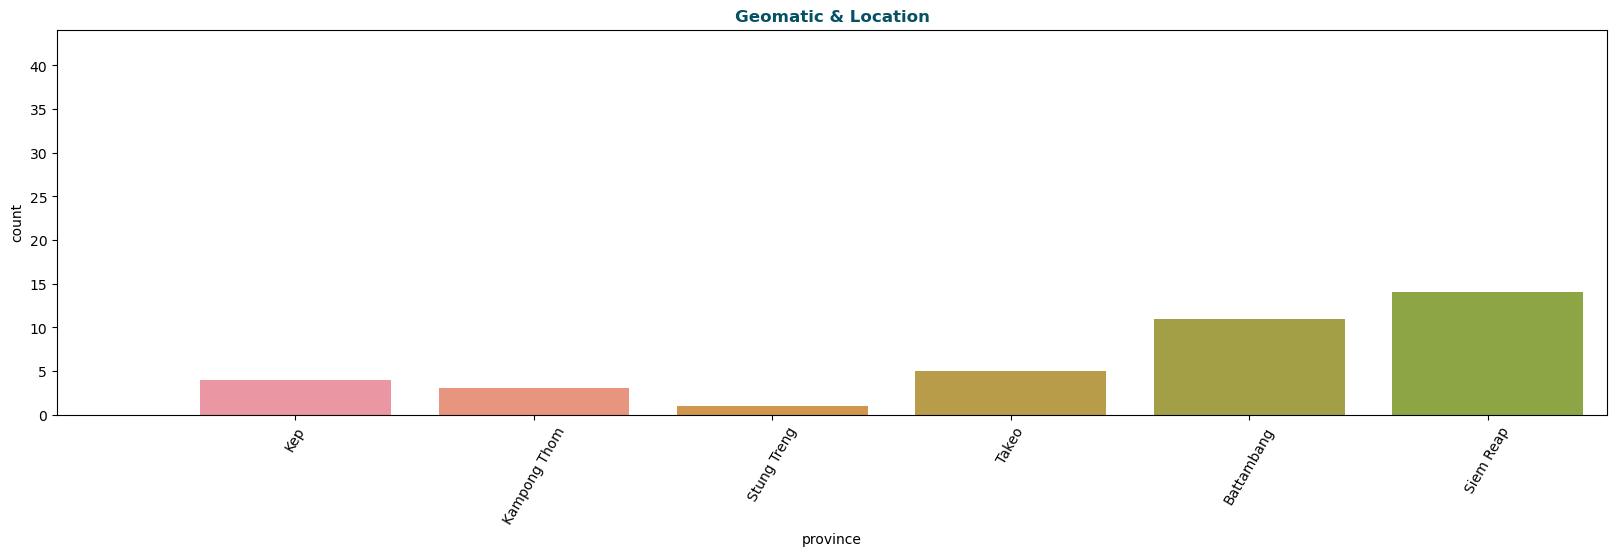

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(x='province', data=bottom_performers_100)
plt.title('Geomatic & Location', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()


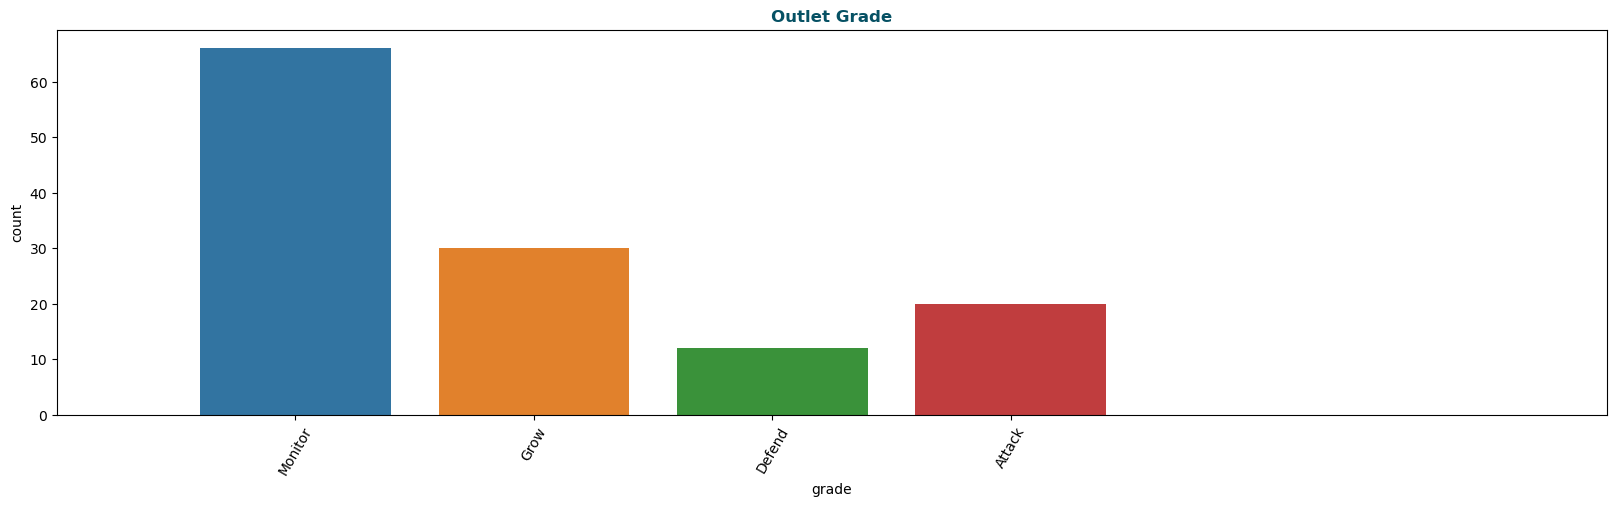

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(x='grade', data=bottom_performers_100)
plt.title('Outlet Grade', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()


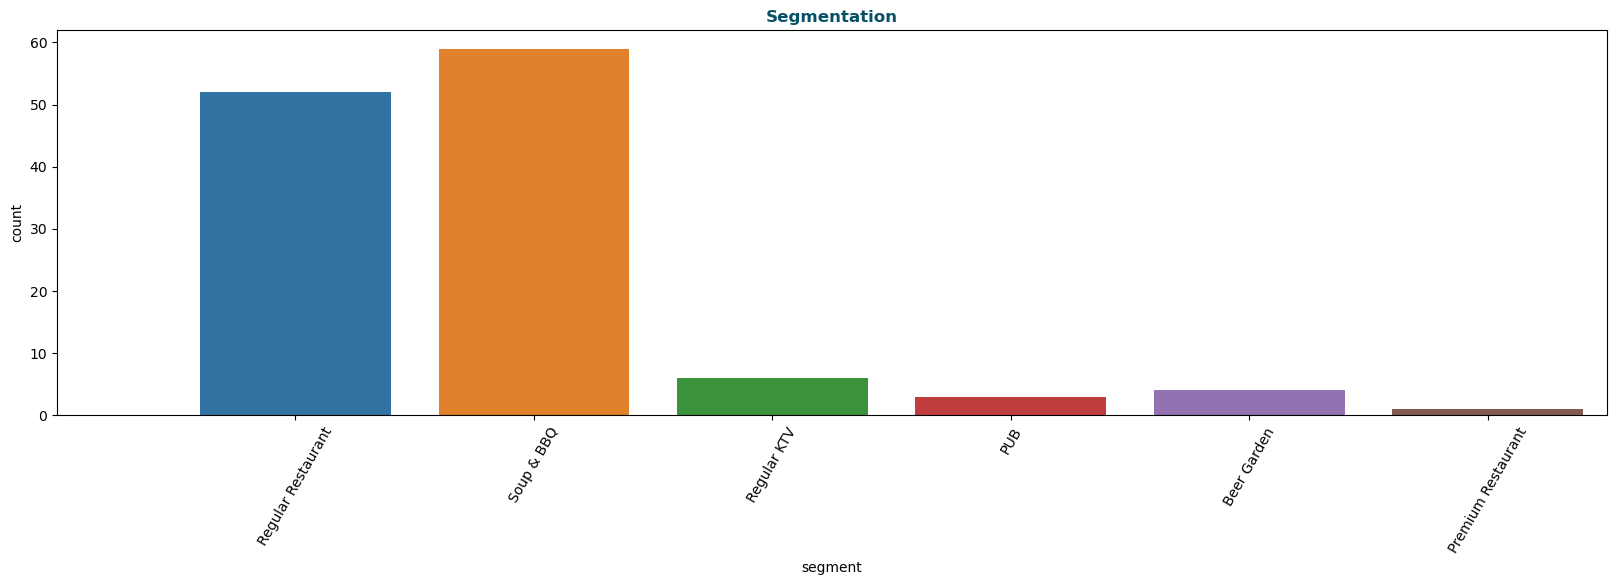

In [70]:
plt.figure(figsize=(20,5))
sns.countplot(x='segment', data=bottom_performers_100)
plt.title('Segmentation', fontweight='bold', fontsize='12', color='#065164')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()